In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 读取数据：

In [19]:
path=r"E:\Users\Boeing\Desktop\aliyun tianchi\二手车交易价格预测\\"

train_data = pd.read_csv(path+r'used_car_train_20200313.csv', sep=' ')
test_data = pd.read_csv(path+r'used_car_testB_20200421.csv', sep=' ')

print('train data shape:',train_data.shape)
print('test data shape:',test_data.shape)

train data shape: (150000, 31)
test data shape: (50000, 30)


训练集预览：

In [6]:
train_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


测试集预览：

In [20]:
test_data.head()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,200000,133777,20000501,67.0,0,1.0,0.0,0.0,101,15.0,...,0.236520,0.000241,0.105319,0.046233,0.094522,3.619512,-0.280607,-2.019761,0.978828,0.803322
1,200001,61206,19950211,19.0,6,2.0,0.0,0.0,73,6.0,...,0.261518,0.000000,0.120323,0.046784,0.035385,2.997376,-1.406705,-1.020884,-1.349990,-0.200542
2,200002,67829,20090606,5.0,5,4.0,0.0,0.0,120,5.0,...,0.261691,0.090836,0.000000,0.079655,0.073586,-3.951084,-0.433467,0.918964,1.634604,1.027173
3,200003,8892,20020601,22.0,9,1.0,0.0,0.0,58,15.0,...,0.236050,0.101777,0.098950,0.026830,0.096614,-2.846788,2.800267,-2.524610,1.076819,0.461610
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014


# 数据基本信息概览：

In [198]:
train_data.iloc[:,:16].describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,regionCode,seller,offerType,creatDate,price
count,150000.000000,150000.000000,1.500000e+05,149999.000000,150000.000000,145494.000000,141320.000000,144019.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.0,1.500000e+05,150000.000000
mean,74999.500000,68349.172873,2.003417e+07,47.129021,8.052733,1.792369,0.375842,0.224943,119.316547,12.597160,2583.077267,0.000007,0.0,2.016033e+07,5923.327333
std,43301.414527,61103.875095,5.364988e+04,49.536040,7.864956,1.760640,0.548677,0.417546,177.168419,3.919576,1885.363218,0.002582,0.0,1.067328e+02,7501.998477
min,0.000000,0.000000,1.991000e+07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.000000,0.000000,0.0,2.015062e+07,11.000000
25%,37499.750000,11156.000000,1.999091e+07,10.000000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,1018.000000,0.000000,0.0,2.016031e+07,1300.000000
50%,74999.500000,51638.000000,2.003091e+07,30.000000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,2196.000000,0.000000,0.0,2.016032e+07,3250.000000
75%,112499.250000,118841.250000,2.007111e+07,66.000000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,3843.000000,0.000000,0.0,2.016033e+07,7700.000000
max,149999.000000,196812.000000,2.015121e+07,247.000000,39.000000,7.000000,6.000000,1.000000,19312.000000,15.000000,8120.000000,1.000000,0.0,2.016041e+07,99999.000000


In [12]:
test_data.describe()

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
count,50000.000000,50000.000000,5.000000e+04,50000.00000,50000.000000,48496.000000,47076.000000,48032.000000,50000.000000,50000.000000,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,224999.500000,68505.606100,2.003401e+07,47.64948,8.087140,1.793736,0.376498,0.226953,119.766960,12.598260,...,0.248147,0.044624,0.124693,0.058198,0.062113,0.019633,0.002759,0.004342,0.004570,-0.007209
std,14433.901067,61032.124271,5.351615e+04,49.90741,7.899648,1.764970,0.549281,0.418866,206.313348,3.912519,...,0.045836,0.051664,0.201440,0.029171,0.035723,3.764095,3.289523,2.515912,1.287194,1.044718
min,200000.000000,1.000000,1.991000e+07,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,...,0.000000,0.000000,0.000000,0.000000,0.000000,-9.119719,-5.662163,-8.291868,-4.157649,-6.098192
25%,212499.750000,11315.000000,1.999100e+07,11.00000,1.000000,0.000000,0.000000,0.000000,75.000000,12.500000,...,0.243436,0.000035,0.062519,0.035413,0.033880,-3.675196,-1.963928,-1.865406,-1.048722,-0.440706
50%,224999.500000,52215.000000,2.003091e+07,30.00000,6.000000,1.000000,0.000000,0.000000,110.000000,15.000000,...,0.257818,0.000801,0.095880,0.056804,0.058749,1.632134,-0.375537,-0.138943,-0.036352,0.136849
75%,237499.250000,118710.750000,2.007110e+07,66.00000,13.000000,3.000000,1.000000,0.000000,150.000000,15.000000,...,0.265263,0.101654,0.125470,0.079387,0.087624,2.846205,1.263451,1.775632,0.945239,0.685555
max,249999.000000,196808.000000,2.015121e+07,246.00000,39.000000,7.000000,6.000000,1.000000,19211.000000,15.000000,...,0.291176,0.153403,1.411559,0.157458,0.211304,12.177864,18.789496,13.384828,5.635374,2.649768


# 可视化分布：

c:\users\boeing\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


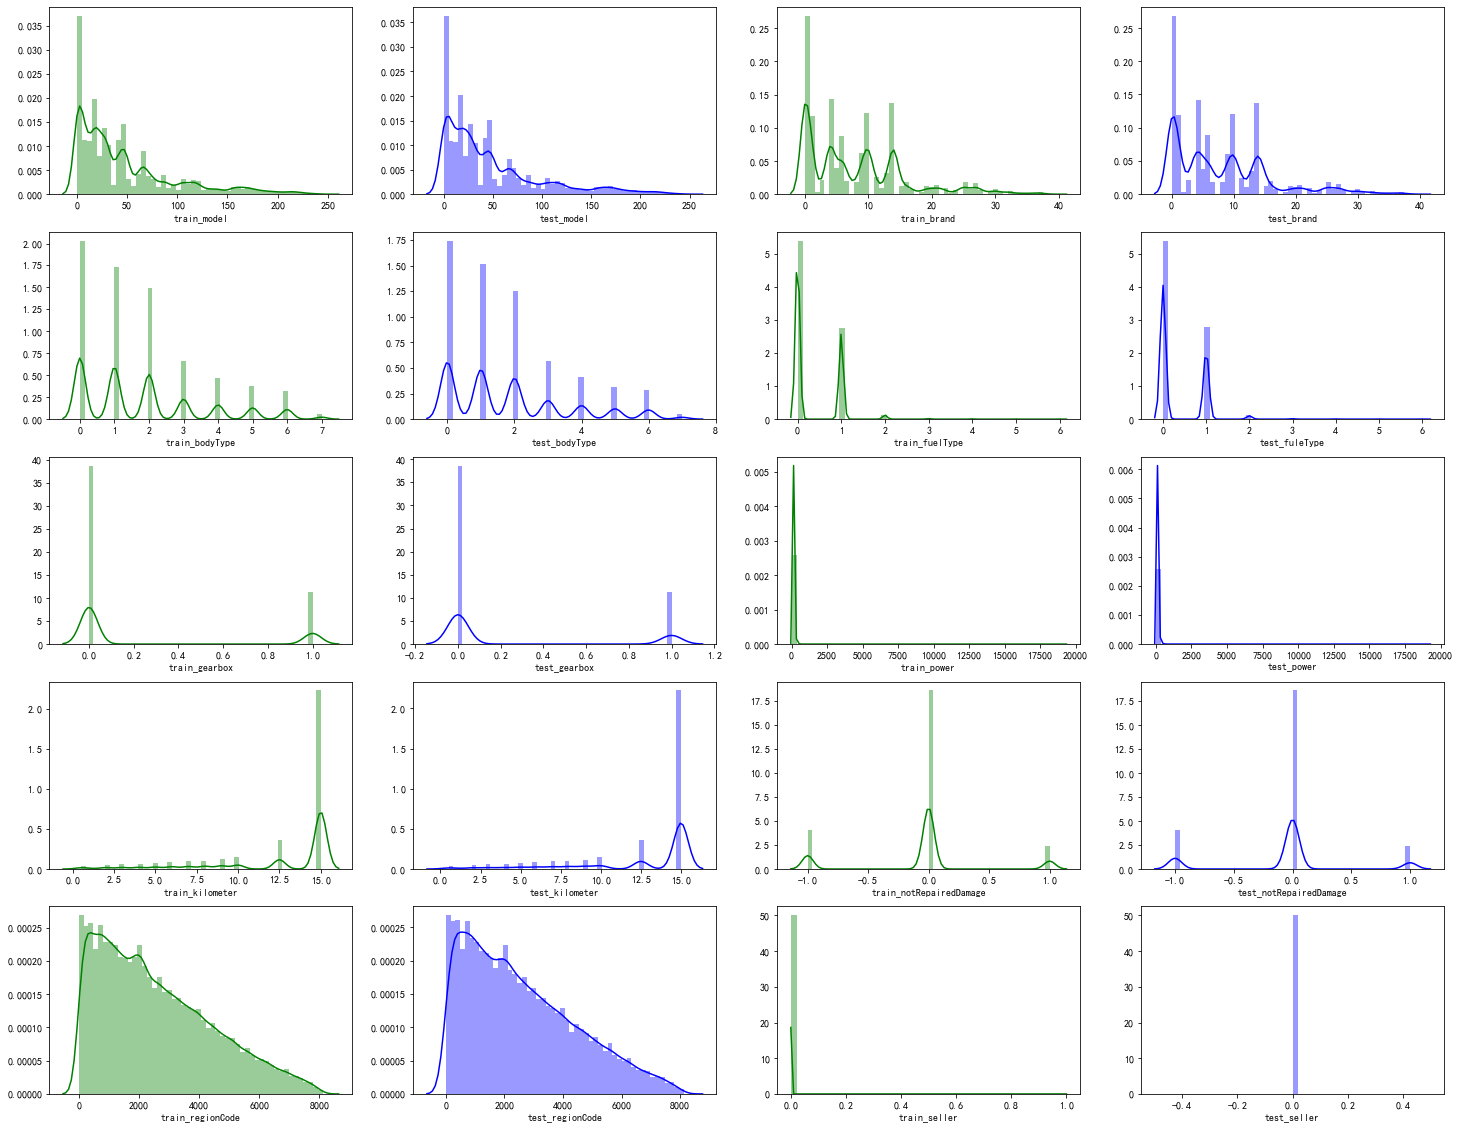

In [6]:
plt.figure(figsize=(25,20))
plt.rcParams['figure.dpi'] = 200

plt.subplot(5,4,1)
sns.distplot(train_data['model'],axlabel='train_model',color='g')
plt.subplot(5,4,2)
sns.distplot(test_data['model'],axlabel='test_model',color='b')

plt.subplot(5,4,3)
sns.distplot(train_data['brand'],axlabel='train_brand',color='g')
plt.subplot(5,4,4)
sns.distplot(test_data['brand'],axlabel='test_brand',color='b')

plt.subplot(5,4,5)
sns.distplot(train_data['bodyType'],axlabel='train_bodyType',color='g')
plt.subplot(5,4,6)
sns.distplot(test_data['bodyType'],axlabel='test_bodyType',color='b')

plt.subplot(5,4,7)
sns.distplot(train_data['fuelType'],axlabel='train_fuelType',color='g')
plt.subplot(5,4,8)
sns.distplot(test_data['fuelType'],axlabel='test_fuleType',color='b')

plt.subplot(5,4,9)
sns.distplot(train_data['gearbox'],axlabel='train_gearbox',color='g')
plt.subplot(5,4,10)
sns.distplot(test_data['gearbox'],axlabel='test_gearbox',color='b')

plt.subplot(5,4,11)
sns.distplot(train_data['power'],axlabel='train_power',color='g')
plt.subplot(5,4,12)
sns.distplot(test_data['power'],axlabel='test_power',color='b')

plt.subplot(5,4,13)
sns.distplot(train_data['kilometer'],axlabel='train_kilometer',color='g')
plt.subplot(5,4,14)
sns.distplot(test_data['kilometer'],axlabel='test_kilometer',color='b')

plt.subplot(5,4,15)
sns.distplot(train_data['notRepairedDamage'].map(lambda x: -1 if(x=='-') else x),axlabel='train_notRepairedDamage',color='g')
plt.subplot(5,4,16)
sns.distplot(test_data['notRepairedDamage'].map(lambda x: -1 if(x=='-') else x),axlabel='test_notRepairedDamage',color='b')

plt.subplot(5,4,17)
sns.distplot(train_data['regionCode'],axlabel='train_regionCode',color='g')
plt.subplot(5,4,18)
sns.distplot(test_data['regionCode'],axlabel='test_regionCode',color='b')

plt.subplot(5,4,19)
sns.distplot(train_data['seller'],axlabel='train_seller',color='g')
plt.subplot(5,4,20)
sns.distplot(test_data['seller'],axlabel='test_seller',color='b')


c:\users\boeing\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
c:\users\boeing\appdata\local\programs\python\python38\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)


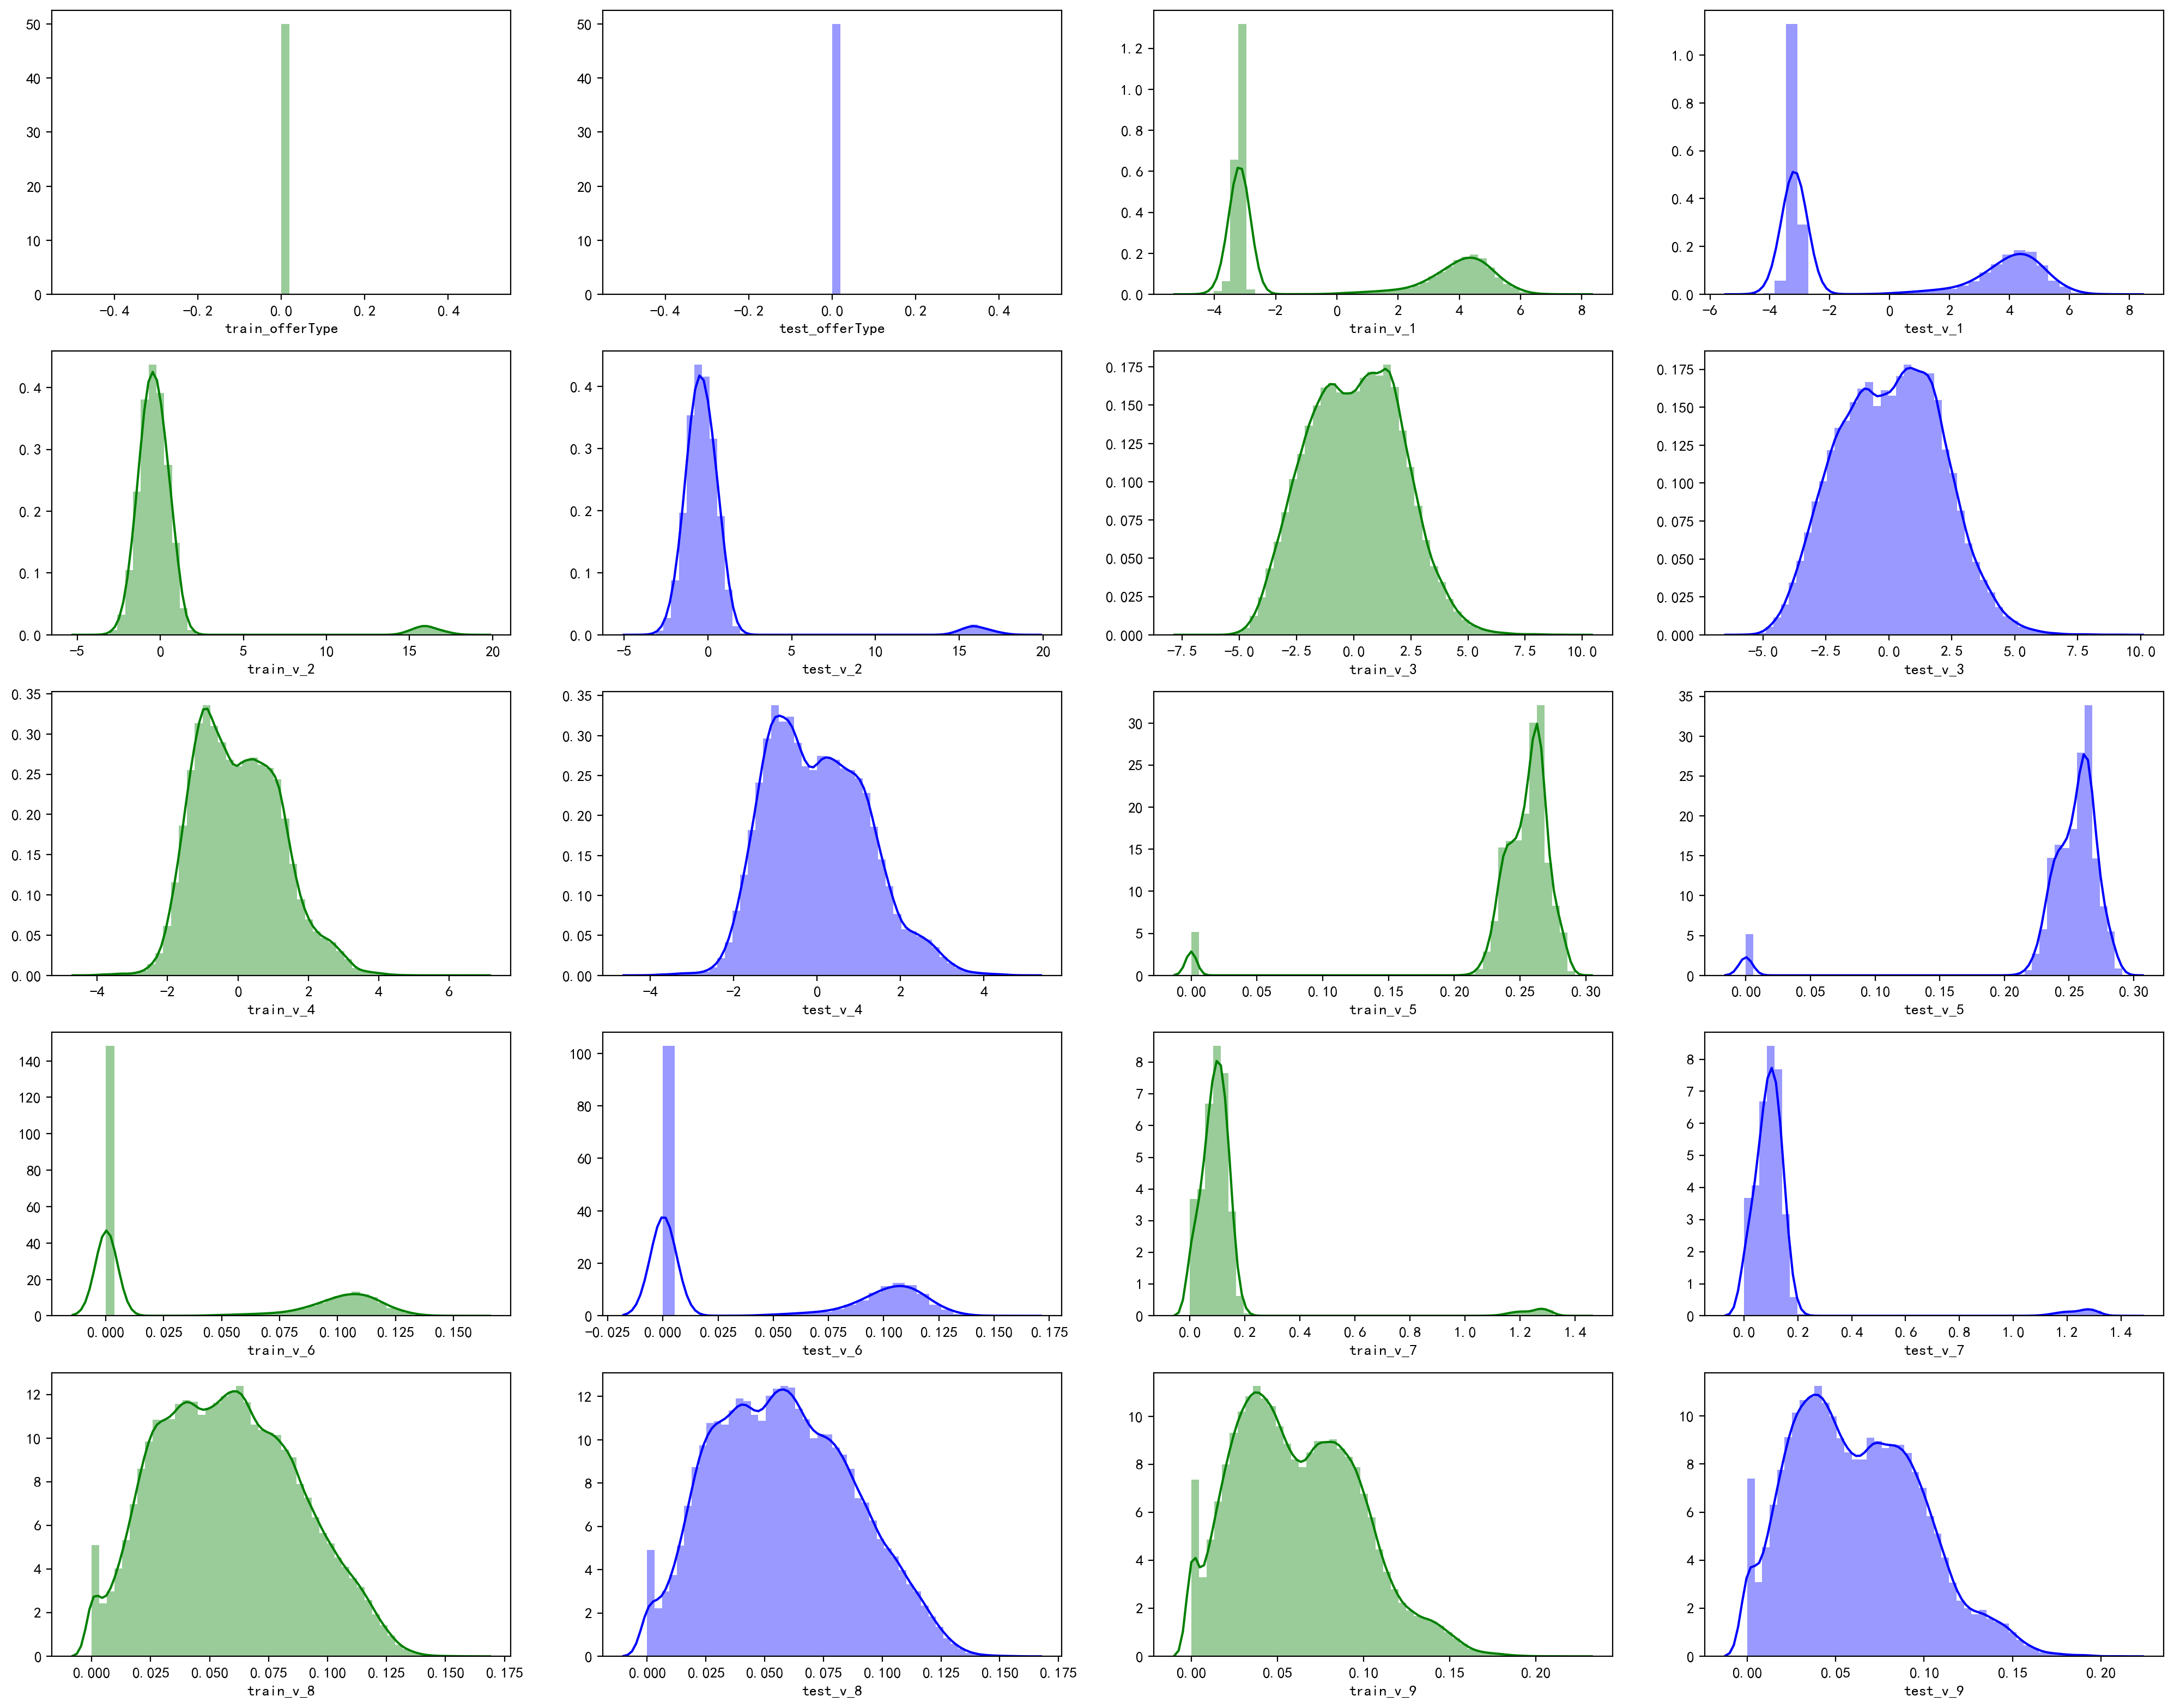

In [8]:
plt.figure(figsize=(25,20))
plt.rcParams['figure.dpi'] = 200

plt.subplot(5,4,1)
sns.distplot(train_data['offerType'],axlabel='train_offerType',color='g')
plt.subplot(5,4,2)
sns.distplot(test_data['offerType'],axlabel='test_offerType',color='b')

plt.subplot(5,4,3)
sns.distplot(train_data['v_1'],axlabel='train_v_1',color='g')
plt.subplot(5,4,4)
sns.distplot(test_data['v_1'],axlabel='test_v_1',color='b')

plt.subplot(5,4,5)
sns.distplot(train_data['v_2'],axlabel='train_v_2',color='g')
plt.subplot(5,4,6)
sns.distplot(test_data['v_2'],axlabel='test_v_2',color='b')

plt.subplot(5,4,7)
sns.distplot(train_data['v_3'],axlabel='train_v_3',color='g')
plt.subplot(5,4,8)
sns.distplot(test_data['v_3'],axlabel='test_v_3',color='b')

plt.subplot(5,4,9)
sns.distplot(train_data['v_4'],axlabel='train_v_4',color='g')
plt.subplot(5,4,10)
sns.distplot(test_data['v_4'],axlabel='test_v_4',color='b')

plt.subplot(5,4,11)
sns.distplot(train_data['v_5'],axlabel='train_v_5',color='g')
plt.subplot(5,4,12)
sns.distplot(test_data['v_5'],axlabel='test_v_5',color='b')

plt.subplot(5,4,13)
sns.distplot(train_data['v_6'],axlabel='train_v_6',color='g')
plt.subplot(5,4,14)
sns.distplot(test_data['v_6'],axlabel='test_v_6',color='b')

plt.subplot(5,4,15)
sns.distplot(train_data['v_7'],axlabel='train_v_7',color='g')
plt.subplot(5,4,16)
sns.distplot(test_data['v_7'],axlabel='test_v_7',color='b')

plt.subplot(5,4,17)
sns.distplot(train_data['v_8'],axlabel='train_v_8',color='g')
plt.subplot(5,4,18)
sns.distplot(test_data['v_8'],axlabel='test_v_8',color='b')

plt.subplot(5,4,19)
sns.distplot(train_data['v_9'],axlabel='train_v_9',color='g')
plt.subplot(5,4,20)
sns.distplot(test_data['v_9'],axlabel='test_v_9',color='b')

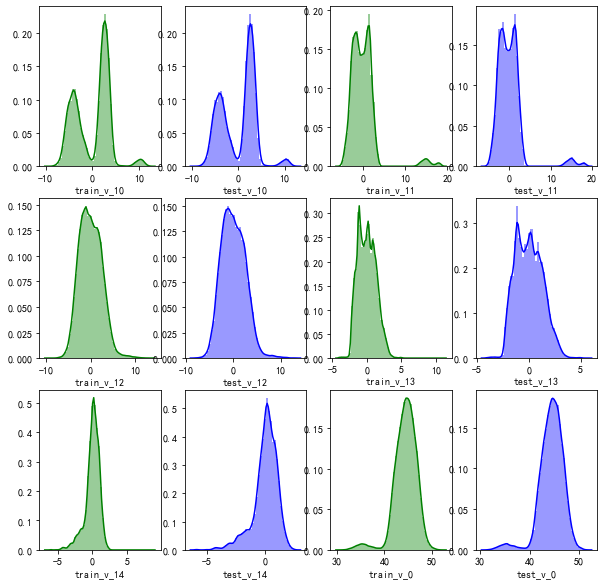

In [24]:
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 100

plt.subplot(3,4,1)
sns.distplot(train_data['v_10'],axlabel='train_v_10',color='g')
plt.subplot(3,4,2)
sns.distplot(test_data['v_10'],axlabel='test_v_10',color='b')
                       
plt.subplot(3,4,3)
sns.distplot(train_data['v_11'],axlabel='train_v_11',color='g')
plt.subplot(3,4,4)
sns.distplot(test_data['v_11'],axlabel='test_v_11',color='b')

plt.subplot(3,4,5)
sns.distplot(train_data['v_12'],axlabel='train_v_12',color='g')
plt.subplot(3,4,6)
sns.distplot(test_data['v_12'],axlabel='test_v_12',color='b')

plt.subplot(3,4,7)
sns.distplot(train_data['v_13'],axlabel='train_v_13',color='g')
plt.subplot(3,4,8)
sns.distplot(test_data['v_13'],axlabel='test_v_13',color='b')

plt.subplot(3,4,9)
sns.distplot(train_data['v_14'],axlabel='train_v_14',color='g')
plt.subplot(3,4,10)
sns.distplot(test_data['v_14'],axlabel='test_v_14',color='b')

plt.subplot(3,4,11)
sns.distplot(train_data['v_0'],axlabel='train_v_0',color='g')
plt.subplot(3,4,12)
sns.distplot(test_data['v_0'],axlabel='test_v_0',color='b')

# 日期字段分布可视化：

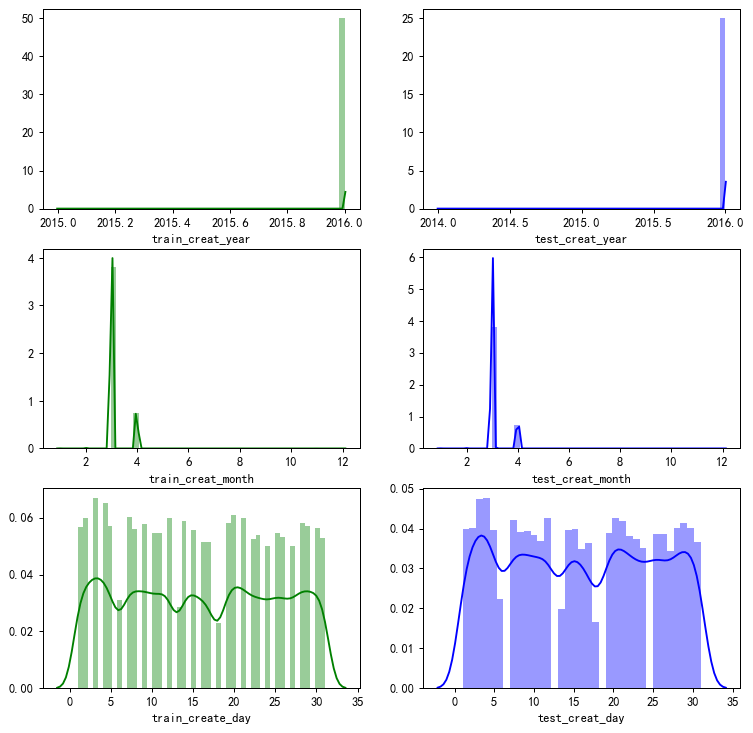

In [16]:
# 汽车上线时间：
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 90

plt.subplot(3,2,1)
sns.distplot(train_data['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='train_creat_year',color='g')
plt.subplot(3,2,2)
sns.distplot(test_data['creatDate'].map(lambda x: int(str(x)[:4])),axlabel='test_creat_year',color='b')

plt.subplot(3,2,3)
sns.distplot(train_data['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel='train_creat_month',color='g')
plt.subplot(3,2,4)
sns.distplot(test_data['creatDate'].map(lambda x: int(str(x)[4:6])),axlabel = 'test_creat_month',color='b')

plt.subplot(3,2,5)
sns.distplot(train_data['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='train_create_day',color='g')
plt.subplot(3,2,6)
sns.distplot(test_data['creatDate'].map(lambda x: int(str(x)[6:])),axlabel='test_creat_day',color='b')

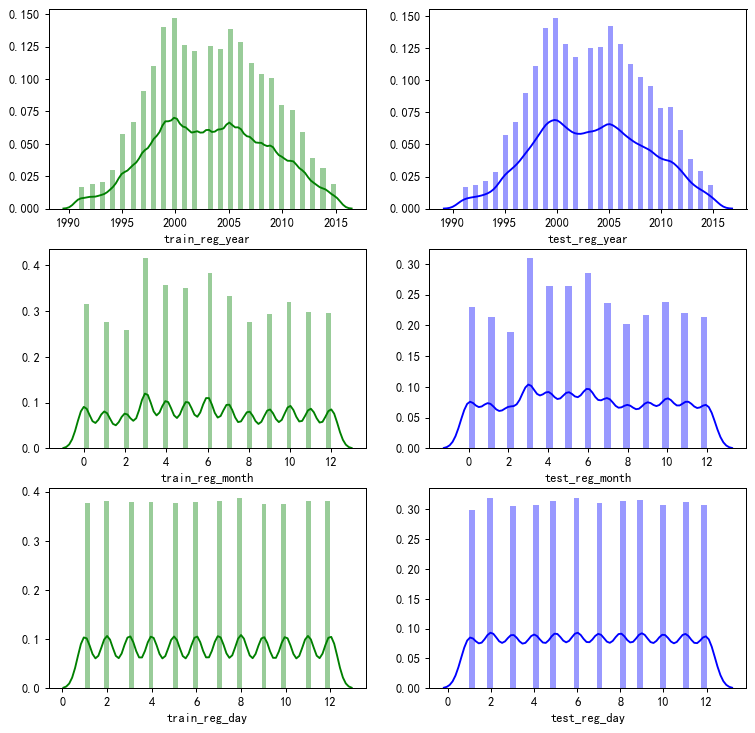

In [18]:
# 汽车注册日期：
plt.figure(figsize=(10,10))
plt.rcParams['figure.dpi'] = 90

plt.subplot(3,2,1)
sns.distplot(train_data['regDate'].map(lambda x: int(str(x)[:4])),axlabel='train_reg_year',color='g')
plt.subplot(3,2,2)
sns.distplot(test_data['regDate'].map(lambda x: int(str(x)[:4])),axlabel='test_reg_year',color='b')

plt.subplot(3,2,3)
sns.distplot(train_data['regDate'].map(lambda x: int(str(x)[4:6])),axlabel='train_reg_month',color='g')
plt.subplot(3,2,4)
sns.distplot(test_data['regDate'].map(lambda x: int(str(x)[4:6])),axlabel = 'test_reg_month',color='b')

plt.subplot(3,2,5)
sns.distplot(train_data['regDate'].map(lambda x: int(str(x)[6:])),axlabel='train_reg_day',color='g')
plt.subplot(3,2,6)
sns.distplot(test_data['regDate'].map(lambda x: int(str(x)[6:])),axlabel='test_reg_day',color='b')

# 目标值交易价格分布可视化以及处理：

Text(0.5, 0, 'log1.001_price')

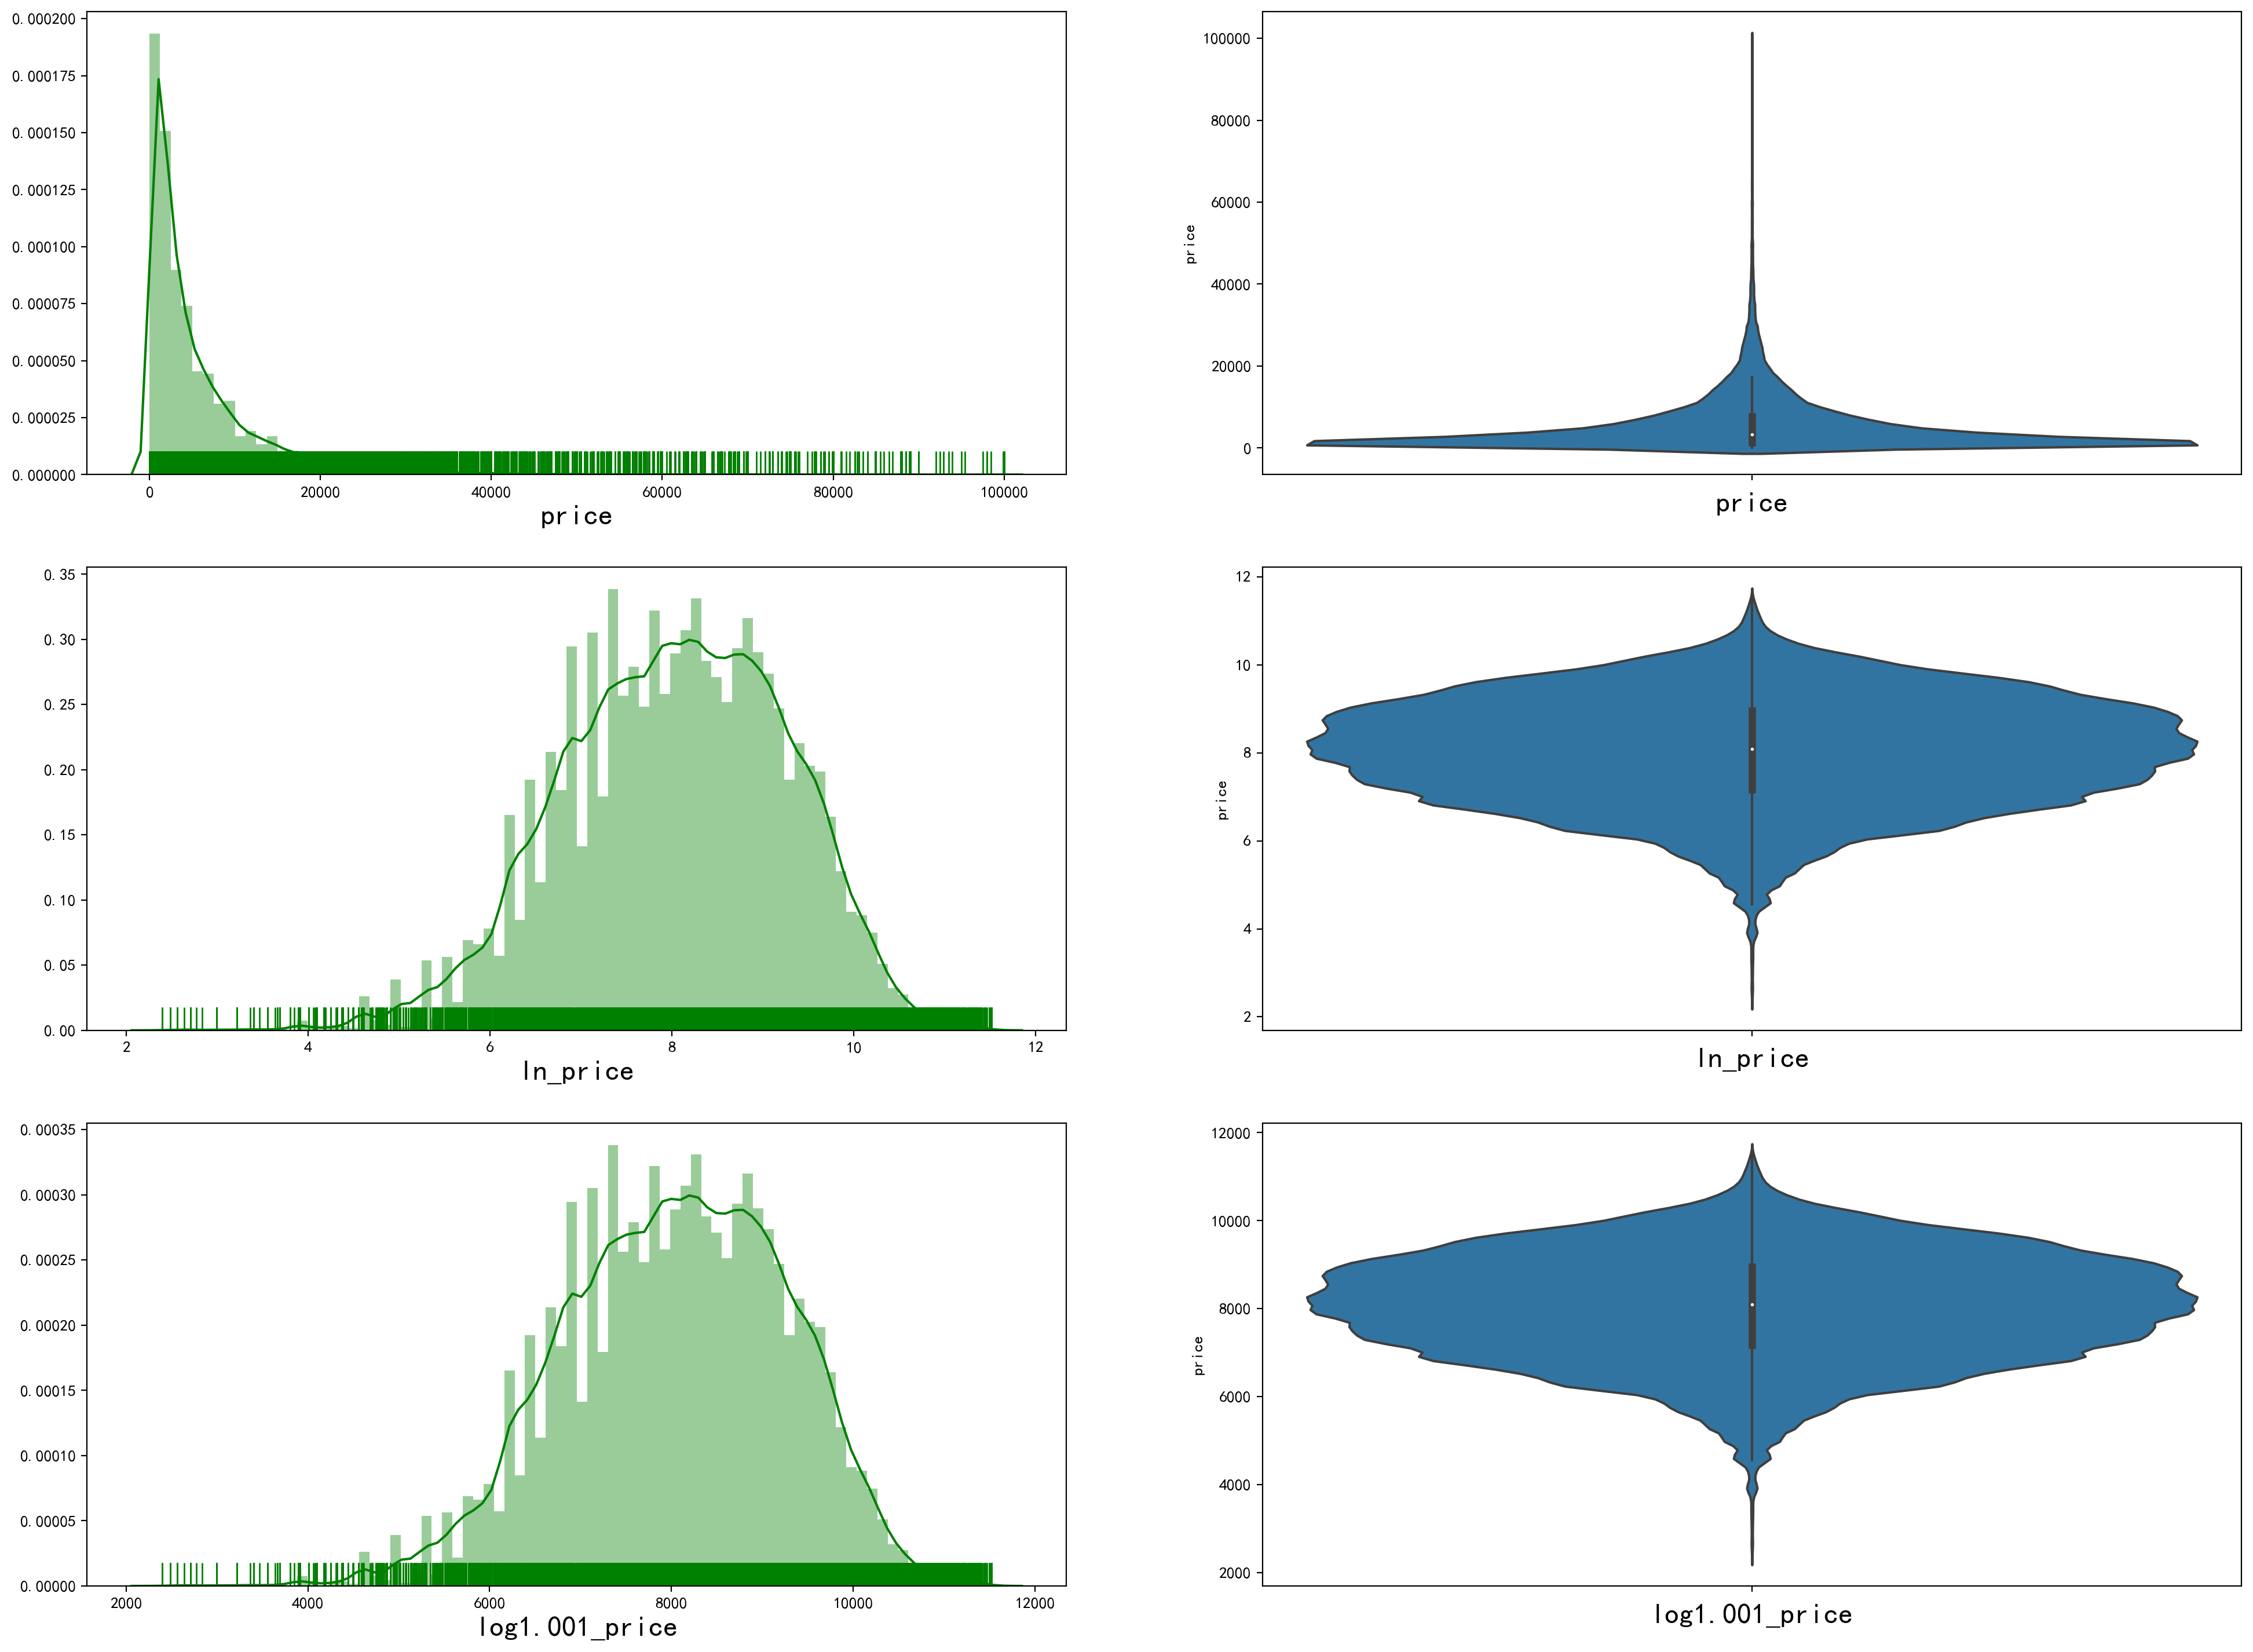

In [85]:
price  = train_data['price']

plt.figure(figsize=(24, 18))
plt.rcParams['figure.dpi'] = 200

#无处理价格分布及提琴图：
plt.subplot(3,2,1)
sns.distplot(price,bins=80,rug=True,color='g')
plt.xlabel('price',fontsize=18)
plt.subplot(3,2,2)
sns.violinplot(y=price)
plt.xlabel('price',fontsize=18)

#以自然数e取price的对数值分布以及提琴图：
plt.subplot(3,2,3)
sns.distplot(np.log(price),bins=80,rug=True,color='g')
plt.xlabel('ln_price',fontsize=18)
plt.subplot(3,2,4)
sns.violinplot(y=np.log(price))
plt.xlabel('ln_price',fontsize=18)

#以自然数e取price的对数值分布以及提琴图：
plt.subplot(3,2,5)
sns.distplot(np.log(price)/np.log(1.001),bins=80,rug=True,color='g')
plt.xlabel('log1.001_price',fontsize=18)
plt.subplot(3,2,6)
sns.violinplot(y=np.log(price)/np.log(1.001))
plt.xlabel('log1.001_price',fontsize=18)

#保存图片：
#plt.savefig(r'E:\Users\Boeing\Desktop\aliyun tianchi\price.jpg')

In [111]:
#复原价格代码：
round(1.001**(np.log(price)/np.log(1.001)))

0         1850.0
1         3600.0
2         6222.0
3         2400.0
4         5200.0
           ...  
149995    5900.0
149996    9500.0
149997    7500.0
149998    4999.0
149999    4700.0
Name: price, Length: 150000, dtype: float64

# boxcox变换：

In [28]:
from scipy import stats

price=train_data['price']

test,lam=stats.boxcox(price)

Text(0.5, 0, 'boxcox')

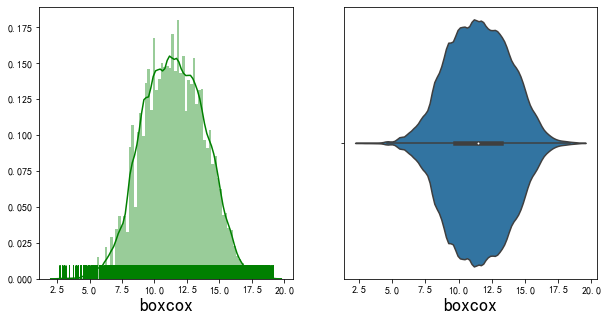

In [22]:
plt.figure(figsize=(10, 5))
plt.rcParams['figure.dpi'] = 80
plt.subplot(1,2,1)
sns.distplot(test,bins=80,rug=True,color='g')
plt.xlabel('boxcox',fontsize=18)
plt.subplot(1,2,2)
sns.violinplot(test)
plt.xlabel('boxcox',fontsize=18)

In [48]:
from scipy.special import inv_boxcox
y=inv_boxcox(test,stats.boxcox(price)[1])

array([1850., 3600., 6222., ..., 7500., 4999., 4700.])

In [ ]:
np.round(y).astype('int64')

In [10]:
train_data['regDate'].corr(train_data['price'])

0.6119591415762218

In [23]:
train_data['regDate'].corr(np.log(price)/np.log(1.001))

0.7391326386733285

# power字段的值应该在600以内，有明显异常值

Text(0.5, 0, 'power<600')

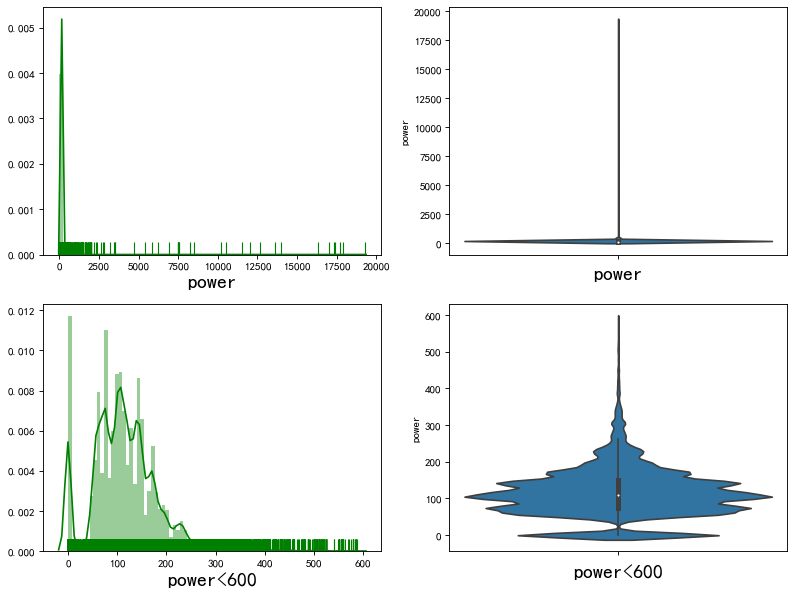

In [147]:
#sns.violinplot(y=train_data[train_data['power']<600]['power'],color='g')

plt.figure(figsize=(12, 9))
plt.rcParams['figure.dpi'] = 80

#power分布及提琴图：
plt.subplot(2,2,1)
sns.distplot(train_data['power'],bins=80,rug=True,color='g')
plt.xlabel('power',fontsize=18)
plt.subplot(2,2,2)
sns.violinplot(y=train_data['power'])
plt.xlabel('power',fontsize=18)

#power处理异常值后分布及提琴图：
plt.subplot(2,2,3)
sns.distplot(train_data[train_data['power']<600]['power'],bins=80,rug=True,color='g')
plt.xlabel('power<600',fontsize=18)
plt.subplot(2,2,4)
sns.violinplot(y=train_data[train_data['power']<600]['power'])
plt.xlabel('power<600',fontsize=18)


In [205]:
#traindata[(traindata['注册日期']>19910001+i*10000)&(traindata['注册日期']<19910001+(i+1)*10000)]['注册日期']
train_data[train_data['power']>600][['power','price']]

,power,price
221,740,21400
534,7515,1499
919,1398,3200
4077,601,1100
4398,1771,9500
...,...,...
148030,776,7000
148246,2598,1000
148365,17700,6000
148665,19312,1500


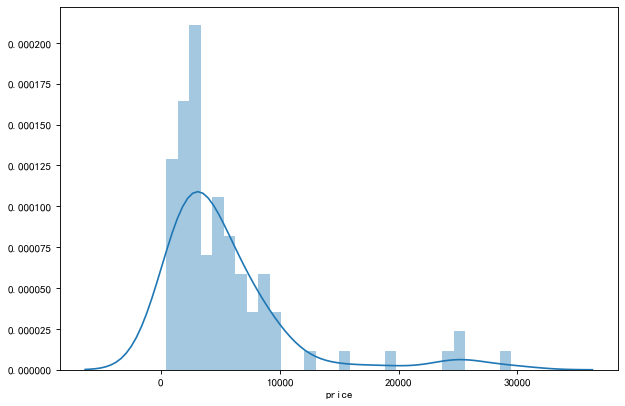

In [204]:
plt.figure(figsize=(9, 6))
sns.distplot(train_data[train_data['power']==279]['price'],bins=30)

# 缺失值以及重复值判断：

训练集缺失值判断：

In [26]:
train_data.isnull().any()
train_data[train_data.isnull().values==True]#每一行有几个缺失值就重复计算几次

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
14,14,1896,20070009,1.0,0,NaN,NaN,0.0,0,15.0,...,0.000000,0.117265,1.297219,0.040885,0.020187,2.550859,18.192443,5.145351,-0.836169,0.645098
14,14,1896,20070009,1.0,0,NaN,NaN,0.0,0,15.0,...,0.000000,0.117265,1.297219,0.040885,0.020187,2.550859,18.192443,5.145351,-0.836169,0.645098
21,21,12784,20021009,8.0,0,0.0,NaN,NaN,116,15.0,...,0.261726,0.087796,0.097778,0.038767,0.050713,-2.902841,0.827034,-0.903175,-0.683878,0.470213
21,21,12784,20021009,8.0,0,0.0,NaN,NaN,116,15.0,...,0.261726,0.087796,0.097778,0.038767,0.050713,-2.902841,0.827034,-0.903175,-0.683878,0.470213
42,42,20694,19960009,0.0,0,4.0,NaN,0.0,90,15.0,...,0.274547,0.074399,0.053081,0.023301,0.048611,-2.036310,0.107458,-2.330682,-1.204632,-0.022019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149970,149970,102173,19970406,48.0,14,1.0,NaN,0.0,45,15.0,...,0.244286,0.000000,0.086501,0.039055,0.061219,3.856471,-0.055220,-2.751949,0.227034,0.811793
149972,149972,183896,20050004,41.0,6,NaN,NaN,NaN,0,15.0,...,0.000000,0.000199,1.149552,0.077486,0.041325,10.267495,14.904306,4.860209,1.492341,0.865779
149972,149972,183896,20050004,41.0,6,NaN,NaN,NaN,0,15.0,...,0.000000,0.000199,1.149552,0.077486,0.041325,10.267495,14.904306,4.860209,1.492341,0.865779
149972,149972,183896,20050004,41.0,6,NaN,NaN,NaN,0,15.0,...,0.000000,0.000199,1.149552,0.077486,0.041325,10.267495,14.904306,4.860209,1.492341,0.865779


In [9]:
train_data[train_data.isnull().T.any()==True]#不重复计算，只计算有缺失值的行数

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
14,14,1896,20070009,1.0,0,NaN,NaN,0.0,0,15.0,...,0.000000,0.117265,1.297219,0.040885,0.020187,2.550859,18.192443,5.145351,-0.836169,0.645098
21,21,12784,20021009,8.0,0,0.0,NaN,NaN,116,15.0,...,0.261726,0.087796,0.097778,0.038767,0.050713,-2.902841,0.827034,-0.903175,-0.683878,0.470213
42,42,20694,19960009,0.0,0,4.0,NaN,0.0,90,15.0,...,0.274547,0.074399,0.053081,0.023301,0.048611,-2.036310,0.107458,-2.330682,-1.204632,-0.022019
45,45,8893,20010306,16.0,13,1.0,NaN,0.0,60,15.0,...,0.230943,0.097976,0.092891,0.009968,0.120308,-2.180792,3.198050,-4.031762,1.411831,0.220874
98,98,31752,20020011,1.0,1,2.0,NaN,1.0,0,15.0,...,0.264775,0.000000,0.130294,0.058610,0.017427,2.699160,-1.707344,0.044953,-1.545575,0.684841
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149937,149937,93471,20071110,8.0,0,0.0,1.0,NaN,0,15.0,...,0.258114,0.000272,0.094870,0.070529,0.059640,2.455670,-2.063267,0.468322,-0.036692,0.895376
149957,149957,3075,20000312,73.0,14,NaN,NaN,0.0,130,15.0,...,0.000000,0.096605,1.168120,0.035414,0.041257,4.497410,18.251639,2.878445,0.721490,0.014877
149970,149970,102173,19970406,48.0,14,1.0,NaN,0.0,45,15.0,...,0.244286,0.000000,0.086501,0.039055,0.061219,3.856471,-0.055220,-2.751949,0.227034,0.811793
149972,149972,183896,20050004,41.0,6,NaN,NaN,NaN,0,15.0,...,0.000000,0.000199,1.149552,0.077486,0.041325,10.267495,14.904306,4.860209,1.492341,0.865779


In [10]:
train_data[['model','bodyType','fuelType','gearbox']].describe()

,model,bodyType,fuelType,gearbox
count,149999.000000,145494.000000,141320.000000,144019.000000
mean,47.129021,1.792369,0.375842,0.224943
std,49.536040,1.760640,0.548677,0.417546
min,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,0.000000
50%,30.000000,1.000000,0.000000,0.000000
75%,66.000000,3.000000,1.000000,0.000000
max,247.000000,7.000000,6.000000,1.000000


训练集重复值判断：

In [27]:
train_data.duplicated().any()

False

测试集缺失值判断：

In [25]:
test_data.isnull().any()
test_data[Test_data.isnull().values==True]

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
4,200004,76998,20030301,46.0,6,0.0,NaN,0.0,116,15.0,...,0.257000,0.000000,0.066732,0.057771,0.068852,2.839010,-1.659801,-0.924142,0.199423,0.451014
14,200014,71892,19980912,8.0,0,2.0,NaN,0.0,0,15.0,...,0.264942,0.116349,0.090508,0.031777,0.022541,-4.540921,1.995253,-1.305126,-1.152695,0.227304
15,200015,80547,19940804,29.0,0,1.0,NaN,0.0,45,15.0,...,0.237053,0.000000,0.141580,0.010333,0.094232,4.316505,0.468168,-4.267994,-0.180084,-0.178720
23,200023,68090,20000910,1.0,0,0.0,0.0,NaN,75,15.0,...,0.266988,0.000000,0.094534,0.043001,0.027576,3.016519,-1.477062,-1.521489,-1.421366,0.488511
40,200040,191536,19970001,31.0,10,2.0,NaN,0.0,122,15.0,...,0.262515,0.000000,0.119237,0.024340,0.031697,3.507789,-0.817229,-2.761023,-1.909564,-1.072358
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49946,249946,30225,20060301,4.0,4,4.0,0.0,NaN,231,7.0,...,0.278607,0.000707,0.065362,0.097559,0.020338,1.376888,-3.652018,2.812064,-0.816844,0.568702
49956,249956,22677,20110102,21.0,16,1.0,1.0,NaN,54,9.0,...,0.238408,0.103287,0.145391,0.062077,0.078825,-3.855720,1.783665,0.879822,0.903671,1.069741
49970,249970,20942,20020508,95.0,22,2.0,NaN,0.0,90,3.0,...,0.248259,0.000000,0.073897,0.051581,0.089506,3.140740,-1.211490,-1.500905,0.504693,-1.276553
49972,249972,32974,20000107,46.0,6,2.0,0.0,NaN,101,12.5,...,0.258142,0.000000,0.063865,0.049594,0.047494,3.203134,-1.158978,-1.696341,-0.286031,0.085127


测试集重复值判断：

In [28]:
test_data.duplicated().any()

False

In [61]:
#bodyType（车身类型）缺失值
print('在训练集中：')
bodyType_null_num=train_data.bodyType[train_data.bodyType.isnull().values==True].shape[0]
print('bodyType(车身类型)缺失值比例为：',bodyType_null_num/50000)
#fuelType（燃油类型）缺失值
fuelType_null_num=train_data.fuelType[train_data.fuelType.isnull().values==True].shape[0]
print('fuelType（燃油类型）缺失值比例为：',fuelType_null_num/50000)
#gearbox（变速箱）缺失值
gearbox_null_num=train_data.gearbox[train_data.gearbox.isnull().values==True].shape[0]
print('gearbox（变速箱）缺失值比例为：',gearbox_null_num/50000)

在训练集中：
bodyType(车身类型)缺失值比例为： 0.09012
fuelType（燃油类型）缺失值比例为： 0.1736
gearbox（变速箱）缺失值比例为： 0.11962


In [62]:
#bodyType（车身类型）缺失值
print('在测试集中：')
bodyType_null_num=test_data.bodyType[test_data.bodyType.isnull().values==True].shape[0]
print('bodyType(车身类型)缺失值比例为：',bodyType_null_num/50000)
#fuelType（燃油类型）缺失值
fuelType_null_num=test_data.fuelType[test_data.fuelType.isnull().values==True].shape[0]
print('fuelType（燃油类型）缺失值比例为：',fuelType_null_num/50000)
#gearbox（变速箱）缺失值
gearbox_null_num=test_data.gearbox[test_data.gearbox.isnull().values==True].shape[0]
print('gearbox（变速箱）缺失值比例为：',gearbox_null_num/50000)

在测试集中：
bodyType(车身类型)缺失值比例为： 0.03008
fuelType（燃油类型）缺失值比例为： 0.05848
gearbox（变速箱）缺失值比例为： 0.03936


In [5]:
#traindata.isnull().sum(axis = 0)/traindata.shape[0]  #各变量中缺失值的比例

# 发现无关特征：

In [60]:
traindata[traindata['销售方']==1].iloc[:,:14]

,交易ID,汽车交易名称,注册日期,车型编码,汽车品牌,车身类型,燃油类型,变速箱,发动机功率,已行驶公里,有无尚未修复的损坏,地区编码,销售方,报价类型
75924,75924,38600,20000804,66.0,9,2.0,0.0,0.0,0,15.0,-,1259,1,0


In [61]:
traindata[traindata['销售方']==1].iloc[:,14:]

,汽车上线时间,交易价格,v_0,v_1,v_2,v_3,v_4,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
75924,20160315,100,41.227073,-3.311367,-2.038434,5.523788,1.985284,0.236835,0.0,0.091834,0.0,0.139018,4.420761,0.240866,-5.848067,0.440098,-1.263728


In [46]:
traindata[traindata['报价类型']==1]

,交易ID,汽车交易名称,注册日期,车型编码,汽车品牌,车身类型,燃油类型,变速箱,发动机功率,已行驶公里,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14


# 相关性探索：

皮尔逊相关系数查看：

In [26]:
train_data.columns

Index(['SaleID', 'name', 'regDate', 'model', 'brand', 'bodyType', 'fuelType',
       'gearbox', 'power', 'kilometer', 'notRepairedDamage', 'regionCode',
       'seller', 'offerType', 'creatDate', 'price', 'v_0', 'v_1', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_10', 'v_11', 'v_12',
       'v_13', 'v_14'],
      dtype='object')

In [32]:
train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','price']].corr('pearson').price
#traindata['有无尚未修复的损坏'].corr(traindata['交易价格'])

regDate      0.611959
power        0.219834
kilometer   -0.440519
v_0          0.628397
v_2          0.085322
v_3         -0.730946
v_4         -0.147085
v_5          0.164317
v_6          0.068970
v_7         -0.053024
v_8          0.685798
v_9         -0.206205
v_11        -0.275320
v_12         0.692823
v_14         0.035911
price        1.000000
Name: price, dtype: float64

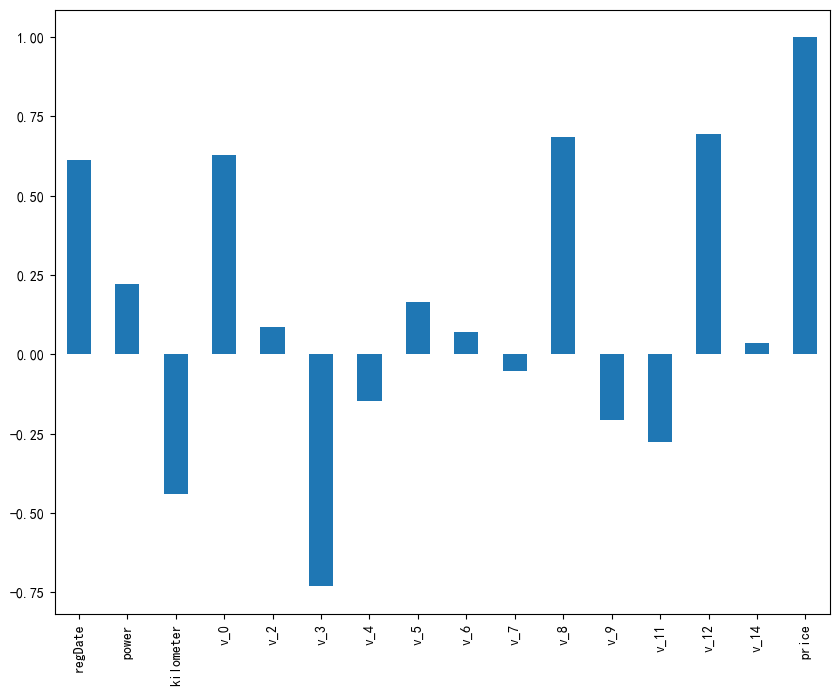

In [26]:
plt.figure(figsize=(10,8))
plt.rcParams['figure.dpi'] = 150
train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','price']].corr('pearson').price.plot.bar()

In [23]:
train_data[train_data['power']<600].power.corr(train_data['price'],method='pearson')

0.567701199166125

In [6]:
train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'price','v_1','v_10']].corr('spearman').price

model         0.102137
brand        -0.102716
bodyType      0.197708
fuelType      0.331829
gearbox       0.307848
regionCode    0.006297
price         1.000000
v_1           0.150472
v_10         -0.507179
Name: price, dtype: float64

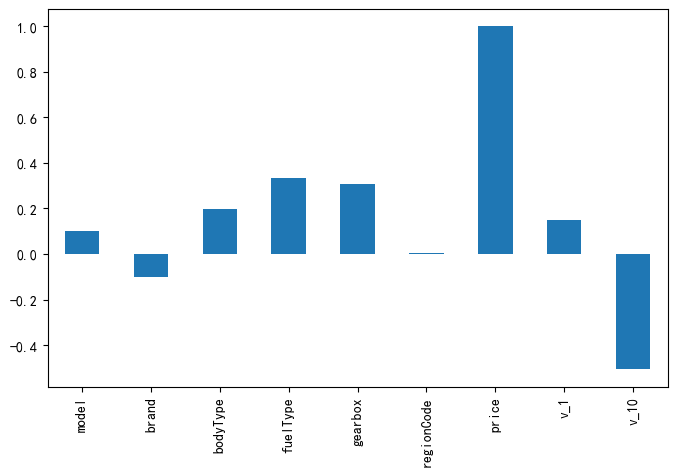

In [25]:
plt.figure(figsize=(8,5))
plt.rcParams['figure.dpi'] = 100
train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'price','v_1','v_10']].corr('spearman').price.plot.bar()

In [68]:
pear=train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','price']].corr('pearson').price
spear=train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'price','v_1','v_10']].corr('spearman').price

print('对标签pearson相关系数求和：',sum(np.abs(pear)))

print('对标签spearman相关系数求和：',sum(np.abs(spear)))

对标签pearson相关系数求和： 6.04642965548152
对标签spearman相关系数求和： 2.7061854500171894


# 对标签进行log转换后的相关性探索：

In [18]:
price  = train_data['price']
x=np.log(price)/np.log(1.001)
train_data['x']=x


In [21]:
train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','x']].corr('pearson').x

regDate      0.739133
power        0.216249
kilometer   -0.377488
v_0          0.780983
v_2          0.033446
v_3         -0.927174
v_4         -0.163415
v_5          0.260403
v_6          0.130683
v_7         -0.146771
v_8          0.833020
v_9         -0.234548
v_11        -0.367326
v_12         0.808428
v_14         0.072143
x            1.000000
Name: x, dtype: float64

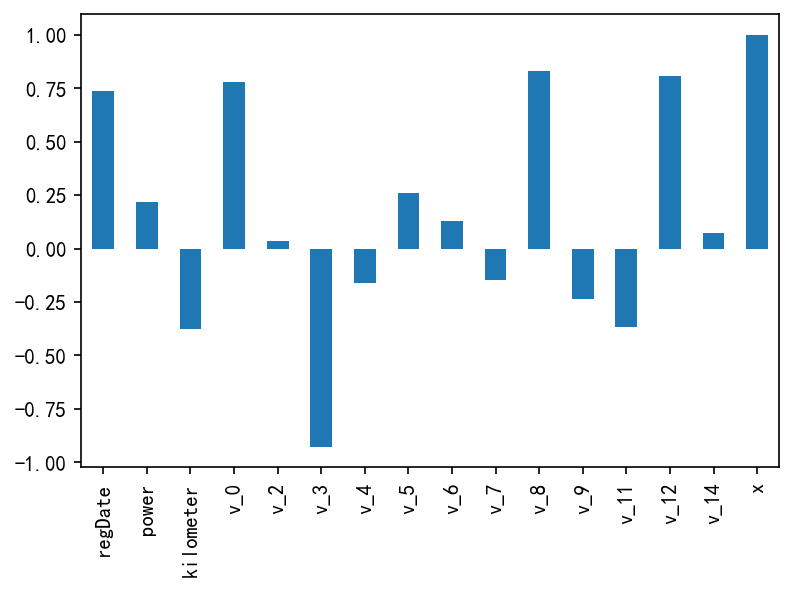

In [20]:
train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','x']].corr('pearson').x.plot.bar()

In [50]:
train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'v_1','v_10','x']].corr('spearman').x

model         0.102137
brand        -0.102716
bodyType      0.197708
fuelType      0.331829
gearbox       0.307848
regionCode    0.006297
v_1           0.150472
v_10         -0.507179
x             1.000000
Name: x, dtype: float64

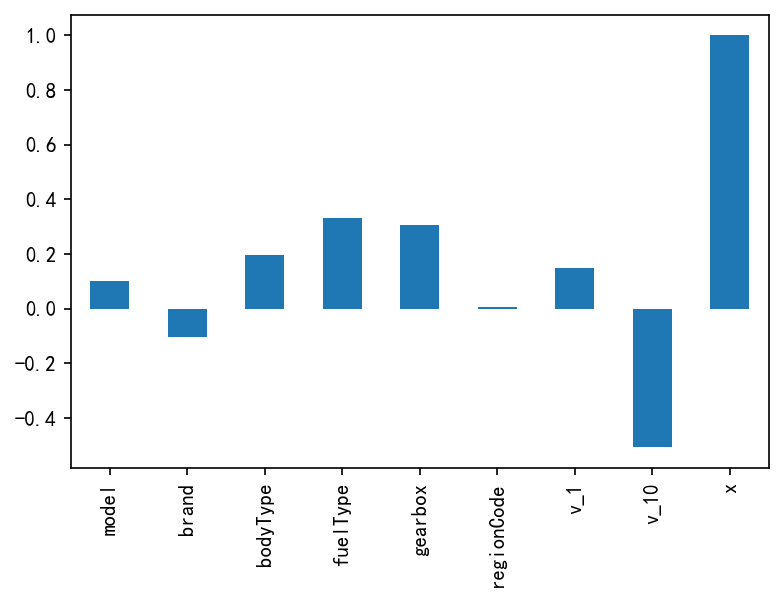

In [22]:
train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'v_1','v_10','x']].corr('spearman').x.plot.bar()

In [66]:
pear=train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','x']].corr('pearson').x
spear=train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'v_1','v_10','x']].corr('spearman').x

print('对标签log变换后的pearson相关系数求和：',sum(np.abs(pear)))

print('对标签log变换后的spearman相关系数求和：',sum(np.abs(spear)))

对标签log变换后的pearson相关系数求和： 7.091210501310974
对标签log变换后的spearman相关系数求和： 2.7061854500171894


In [52]:
train_data=train_data.drop(['x'],axis=1)

# 尝试查看boxcox变换后的相关系数:

In [63]:
train_data['test']=test

train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','test']].corr('pearson').test

regDate      0.746924
power        0.220537
kilometer   -0.394459
v_0          0.780695
v_2          0.043521
v_3         -0.926946
v_4         -0.162261
v_5          0.252138
v_6          0.127693
v_7         -0.136625
v_8          0.837022
v_9         -0.235164
v_11        -0.362474
v_12         0.816091
v_14         0.070267
test         1.000000
Name: test, dtype: float64

In [64]:
pear=train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','test']].corr('pearson').test
spear=train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'v_1','v_10','test']].corr('spearman').test

print('对标签boxcox变换后的pearson相关系数求和：',sum(np.abs(pear)))

print('对标签boxcox变换后的spearman相关系数求和：',sum(np.abs(spear)))

对标签boxcox变换后的pearson相关系数求和： 7.112816970013016
对标签boxcox变换后的spearman相关系数求和： 2.7061854500171894


# 降低数据内存模块：

In [122]:


def reduce_mem_usage(df):
    for col in df.columns:
        col_type=df[col].dtype
        
        if col_type!=object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:-3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max< np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_min< np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_min< np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_min< np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)
            else:
                if c_min > np.finfo(np.float16).min and c_min< np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_min< np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')
    return df



In [132]:
x=reduce_mem_usage(train_data)

In [133]:
x

,SaleID,name,regDate,model,brand,bodyType,fuelType,gearbox,power,kilometer,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0.0,736.0,20040402.0,30.0,6.0,1.0,0.0,0.0,60.0,12.5,...,0.235718,0.101990,0.129517,0.022812,0.097473,-2.880859,2.804688,-2.419922,0.795410,0.914551
1,1.0,2262.0,20030300.0,40.0,1.0,2.0,0.0,0.0,0.0,15.0,...,0.264893,0.121033,0.135742,0.026596,0.020584,-4.902344,2.095703,-1.030273,-1.722656,0.245483
2,2.0,14872.0,20040404.0,115.0,15.0,1.0,0.0,0.0,163.0,12.5,...,0.251465,0.114929,0.165161,0.062164,0.027069,-4.847656,1.803711,1.565430,-0.832520,-0.229980
3,3.0,inf,19960908.0,109.0,10.0,0.0,0.0,1.0,193.0,15.0,...,0.274414,0.110291,0.121948,0.033386,0.000000,-4.507812,1.286133,-0.501953,-2.437500,-0.478760
4,4.0,inf,20120104.0,110.0,5.0,1.0,0.0,0.0,68.0,5.0,...,0.228027,0.073181,0.091858,0.078796,0.121521,-1.896484,0.910645,0.931152,2.833984,1.923828
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149995,inf,inf,20000608.0,121.0,10.0,4.0,0.0,1.0,163.0,15.0,...,0.280273,0.000310,0.048431,0.071167,0.019180,1.988281,-2.984375,0.589355,-1.304688,-0.302490
149996,inf,inf,20091102.0,116.0,11.0,0.0,0.0,0.0,125.0,10.0,...,0.253174,0.000777,0.084106,0.099670,0.079346,1.838867,-2.775391,2.554688,0.924316,-0.272217
149997,inf,inf,20101004.0,60.0,11.0,1.0,1.0,0.0,90.0,6.0,...,0.233398,0.000705,0.118896,0.100098,0.097900,2.439453,-1.630859,2.291016,1.891602,0.415039
149998,inf,45920.0,20060312.0,34.0,10.0,3.0,1.0,0.0,156.0,15.0,...,0.256348,0.000252,0.081482,0.083557,0.081482,2.076172,-2.632812,1.415039,0.431885,-1.659180


# 数据初步总结：

1.数据中没有重复值

2.缺失值占比较高，所有数据中有12.7%有缺失值，

3.缺失值集中在bodyType（车身类型），fuelType（燃油类型），gearbox（变速箱）这三个字段中。

4.其中在训练集中：

    bodyType(车身类型)缺失比例： 9%

    fuelType（燃油类型）缺失比例： 17.3%

    gearbox（变速箱）缺失比例： 12%

5.在测试集中：

    bodyType(车身类型)缺失比例： 3%

    fuelType（燃油类型）缺失比例： 5.8%

    gearbox（变速箱）缺失比例： 4%

后续根据算法再进行相应的缺失值处理

6.‘销售方’字段只有一条数据是1，‘报价类型’字段全部是0，因此这两个字段可以忽略不计，属于无关特征。

7.首先可以直观知道‘交易ID’，‘汽车交易名称’这两个字段为无关特征。通过相关系数，我们看到，‘交易ID’和‘汽车交易名称’与‘销售方’的值大致，可确定为无关特征。

# 进一步探索以及数据可视化：

更换字段名称：

In [5]:
col = ['交易ID','汽车交易名称','注册日期','车型编码','汽车品牌','车身类型',
       '燃油类型','变速箱','发动机功率','已行驶公里','有无尚未修复的损坏',
       '地区编码','销售方','报价类型','汽车上线时间','交易价格']
col.extend(each for each in train_data.columns[16:])
name = {i:j for i,j in zip(train_data.columns,col)}

traindata = train_data.rename(columns=name)
#traindata.to_csv(r"C:\Users\Boeing\Desktop\aliyun tianchi\traindata.csv")

In [22]:
traindata.head()

,交易ID,汽车交易名称,注册日期,车型编码,汽车品牌,车身类型,燃油类型,变速箱,发动机功率,已行驶公里,...,v_5,v_6,v_7,v_8,v_9,v_10,v_11,v_12,v_13,v_14
0,0,736,20040402,30.0,6,1.0,0.0,0.0,60,12.5,...,0.235676,0.101988,0.129549,0.022816,0.097462,-2.881803,2.804097,-2.420821,0.795292,0.914762
1,1,2262,20030301,40.0,1,2.0,0.0,0.0,0,15.0,...,0.264777,0.121004,0.135731,0.026597,0.020582,-4.900482,2.096338,-1.030483,-1.722674,0.245522
2,2,14874,20040403,115.0,15,1.0,0.0,0.0,163,12.5,...,0.251410,0.114912,0.165147,0.062173,0.027075,-4.846749,1.803559,1.565330,-0.832687,-0.229963
3,3,71865,19960908,109.0,10,0.0,0.0,1.0,193,15.0,...,0.274293,0.110300,0.121964,0.033395,0.000000,-4.509599,1.285940,-0.501868,-2.438353,-0.478699
4,4,111080,20120103,110.0,5,1.0,0.0,0.0,68,5.0,...,0.228036,0.073205,0.091880,0.078819,0.121534,-1.896240,0.910783,0.931110,2.834518,1.923482


数据信息整体描述：

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 分别以燃油类型，车身类型，变速箱为分类标准查看交易价格分布：

<Figure size 1500x900 with 0 Axes>

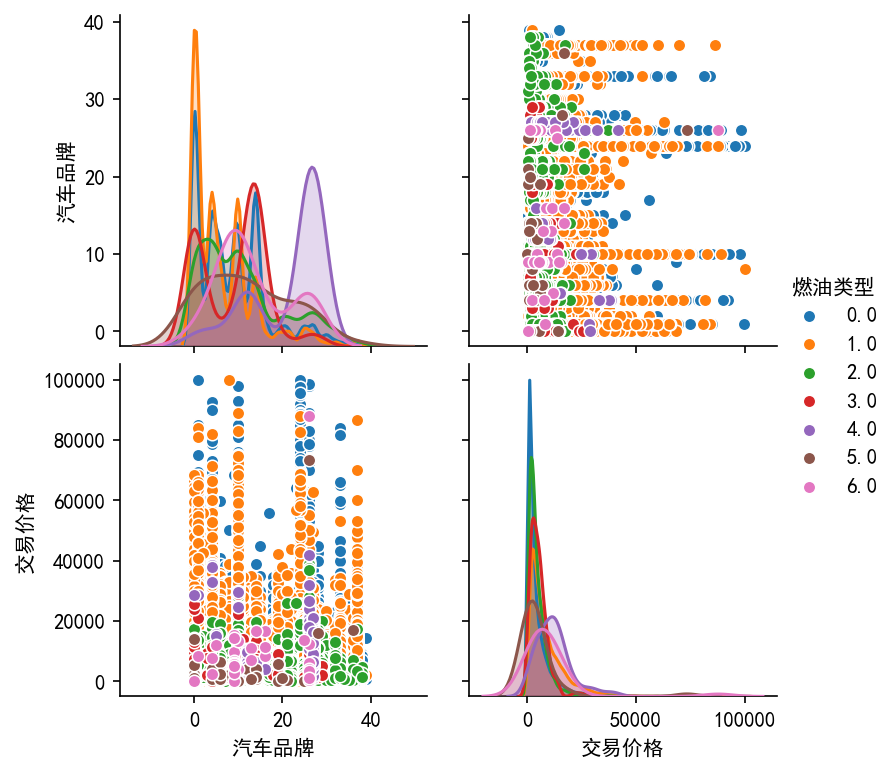

In [38]:
plt.figure(figsize=(10, 6))
plt.rcParams['figure.dpi'] = 150
sns.pairplot(traindata[['燃油类型','汽车品牌','交易价格']],hue='燃油类型')

<Figure size 1800x1080 with 0 Axes>

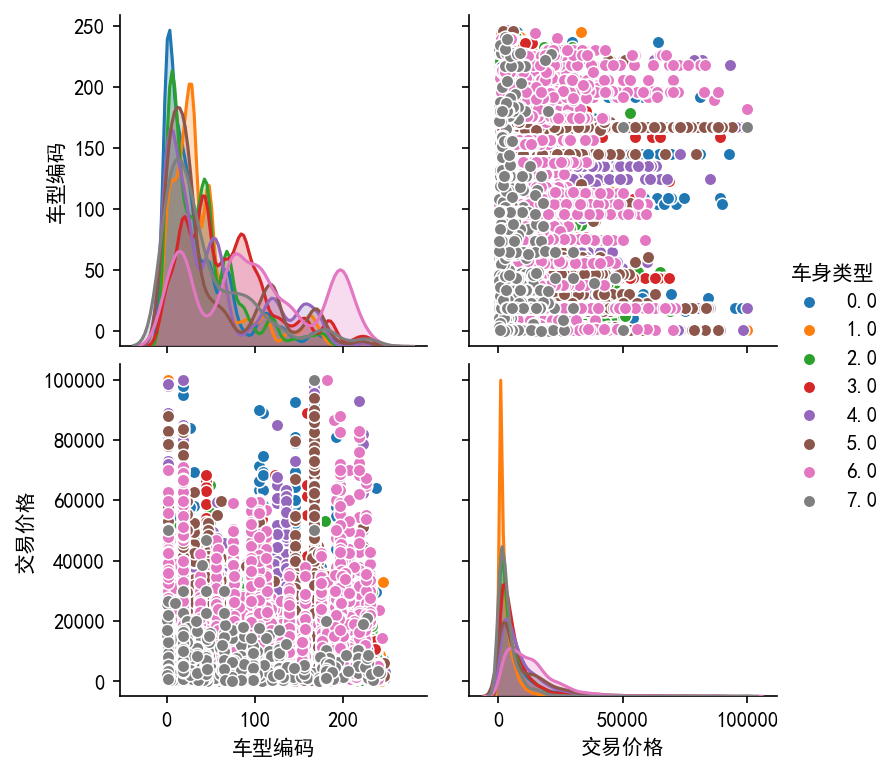

In [73]:
plt.figure(figsize=(10, 6))
plt.rcParams['figure.dpi'] = 150
sns.pairplot(traindata[['车型编码','交易价格','车身类型']],hue='车身类型')

<Figure size 1500x900 with 0 Axes>

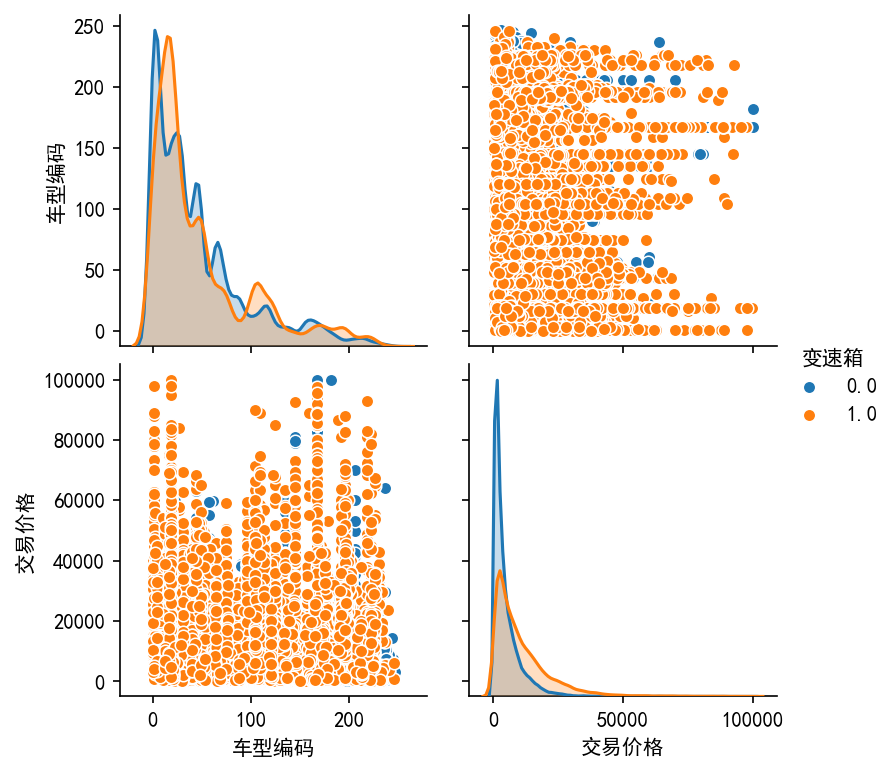

In [74]:
plt.figure(figsize=(10, 6))
plt.rcParams['figure.dpi'] = 150
sns.pairplot(traindata[['车型编码','交易价格','变速箱']],hue='变速箱')

<Figure size 1500x900 with 0 Axes>

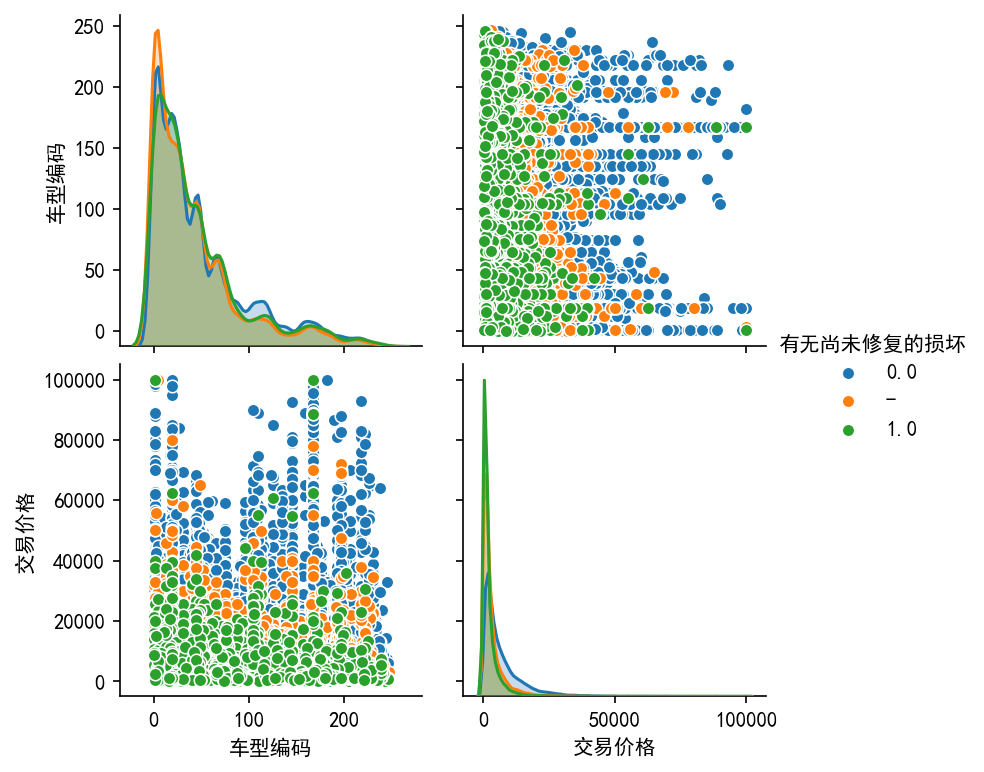

In [75]:
plt.figure(figsize=(10, 6))
plt.rcParams['figure.dpi'] = 150
sns.pairplot(traindata[['车型编码','交易价格','有无尚未修复的损坏']],hue='有无尚未修复的损坏')

# 皮尔逊相关性程度热力图：

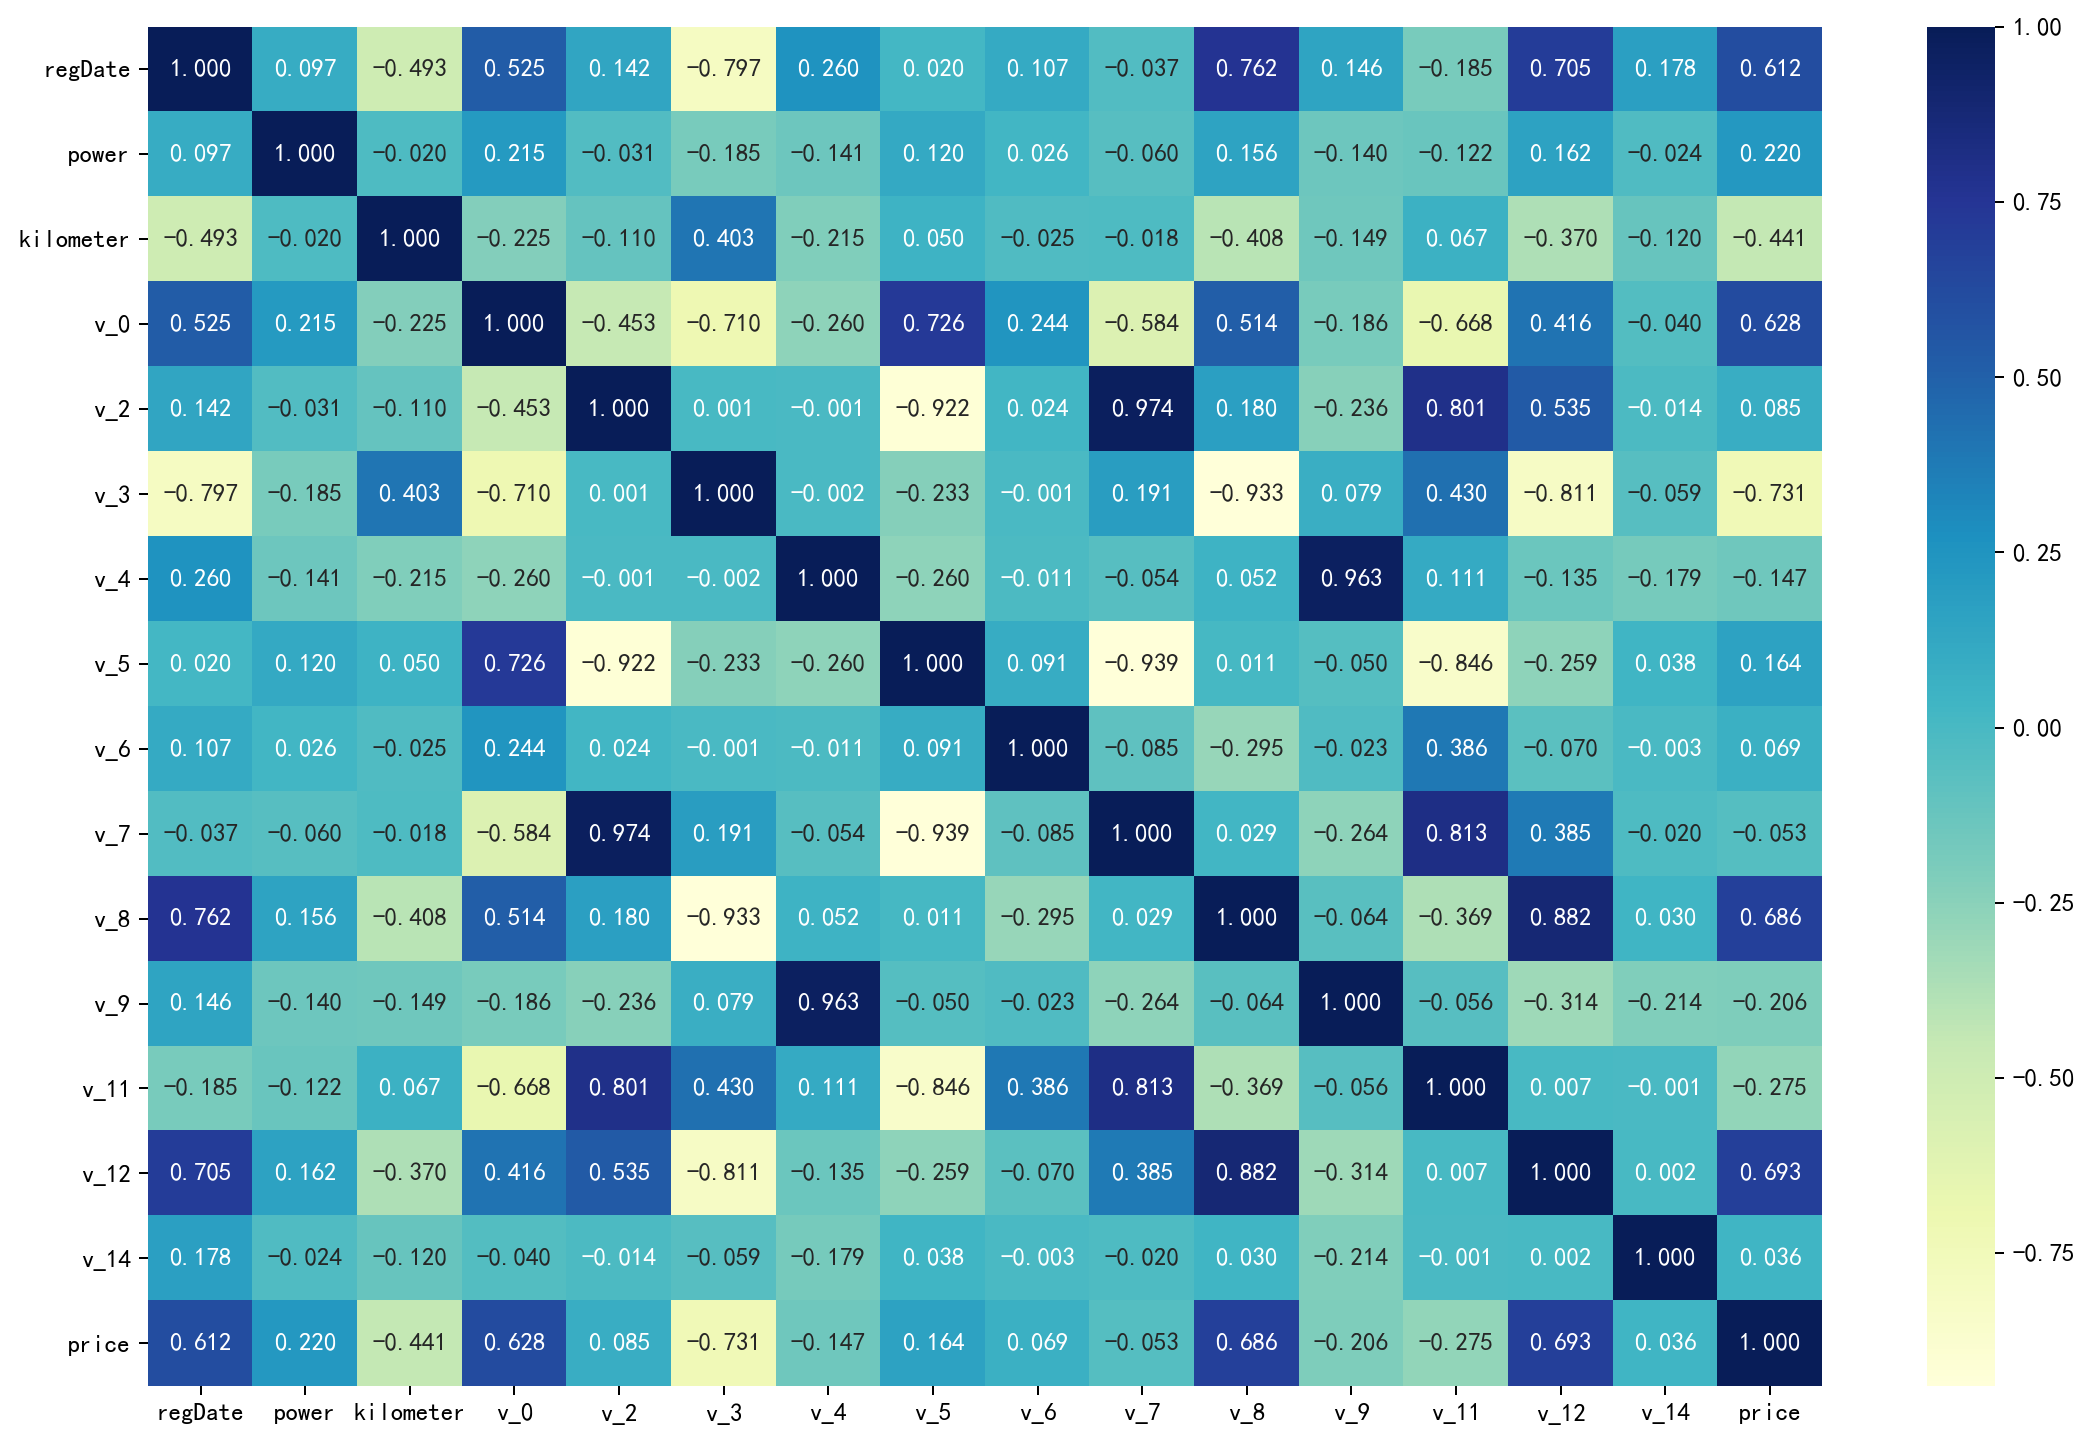

In [9]:
plt.figure(figsize=(15, 10))
plt.rcParams['figure.dpi'] = 180
sns.heatmap(train_data[['regDate','power','kilometer','v_0', 'v_2', 'v_3',
       'v_4', 'v_5', 'v_6', 'v_7', 'v_8', 'v_9', 'v_11', 'v_12',
       'v_14','price']].corr('pearson'), annot=True, cmap="YlGnBu",fmt=".3f")#fmt参数格式化要求
#plt.savefig(r'C:\Users\Boeing\Desktop\aliyun tianchi\heatmap.png')

# 斯皮尔曼相关性程度热力图：

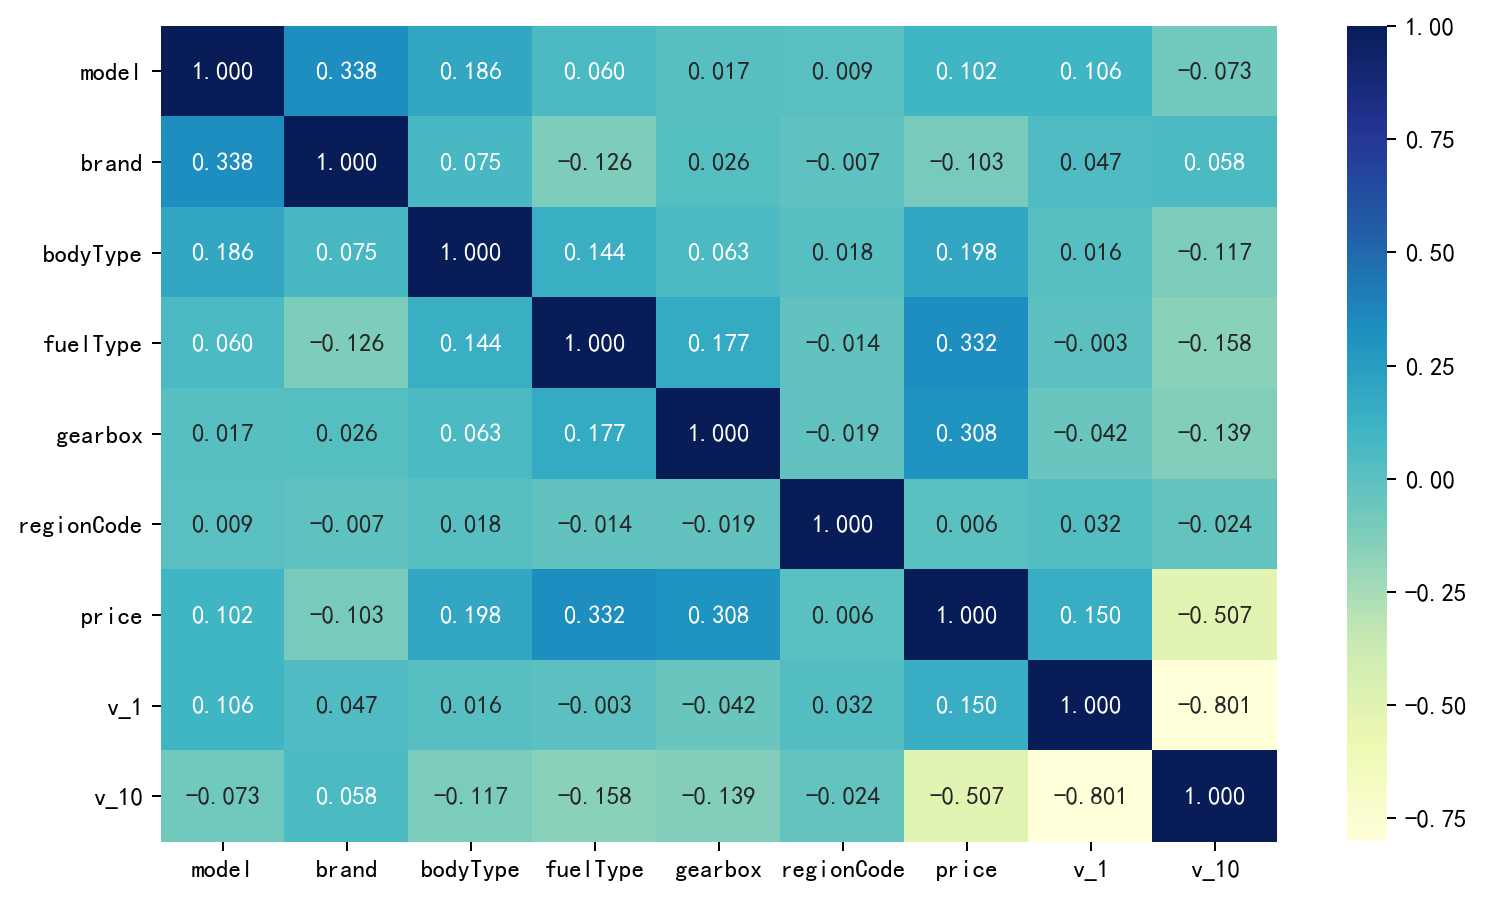

In [12]:
plt.figure(figsize=(10,6))
plt.rcParams['figure.dpi'] = 180
sns.heatmap(train_data[['model', 'brand', 'bodyType', 'fuelType',
       'gearbox','notRepairedDamage', 'regionCode',
       'price','v_1','v_10']].corr('spearman'), annot=True, cmap="YlGnBu",fmt=".3f")#fmt参数格式化要求

# 数据处理方法总结：

#通用型处理：

 1.‘交易ID’，‘汽车交易名称’，‘销售方’，‘报价类型’，属于无关特征，删除。
 
 2.‘注册日期’字段与目标值相关程度很高，‘汽车上线时间’字段与目标值的相关程度却很低。因此构造一个字段‘上线时间-注册日期’，此字段为注册日期到汽车上线时间的时间差，单位为天。
 
#选择型处理：
 
 3.‘有无尚未修复的损坏’字段有三个特征分别为‘0’，‘1’，‘-’。官方字段表说明此字段只有‘0’，‘1’两个值。通过以该字段为标准分类查看其与交易价格的关系分布可知：高交易价格大多数是为‘0’的，而‘1’和‘-’分布在交易价格的中低区间。因此猜测未知的‘-’应该是‘1’。此字段根据后续算法来具体处理(如果选择决策树类算法，可不予理睬。)
 
 4.有缺失值的样本数量占比将近10%，且与目标值交易价格具有一定的相关性。并且可以使用测试集的数据来预测缺失值，因此决定先预测缺失值，之后可与不预测做对比。预测方法：knn，集成学习。
 
 5.目标值交易价格可用对数函数进行变换。
 
 6.‘power’字段大于600的异常值可缩小至正常范围以内。

# 特征选择：

In [ ]:
#各互信息：
from sklearn.feature_selection import mutual_info_regression as MIC

result1 = MIC(train_data[['使用时间']],train_data['交易价格'])

#result1 = MIC(train_data[['使用时间', '汽车品牌', '发动机功率']],train_data['交易价格'])

#result2 = MIC(train_data[['已行驶公里','有无尚未修复的损坏', '地区编码']],train_data['交易价格'])

#result3 = MIC(train_data[['v_0', 'v_3', 'v_5', 'v_8',]],train_data['交易价格'])

#result4 = MIC(train_data[['v_9', 'v_10','v_11', 'v_12']],train_data['交易价格'])

#result5 = MIC(train_data[['pca1', 'pca2', 'pca3']],train_data['交易价格'])
 
#k = result.shape[0] - sum(result <= 0)

In [ ]:
result

In [ ]:
#F检验
from sklearn.feature_selection import f_regression
 
F, pvalues_f = f_classif(train_data[['使用时间', '汽车品牌', '发动机功率', '已行驶公里',
       '有无尚未修复的损坏', '地区编码', 'v_0', 'v_3', 'v_5', 'v_8', 'v_9', 'v_10',
       'v_11', 'v_12', 'pca1', 'pca2', 'pca3']],train_data['交易价格'])

# 特征工程：

# 1.删除无关特征：‘交易ID’，‘汽车交易名称’，‘销售方’，‘报价类型’

In [6]:
traindata=traindata.drop(['交易ID','汽车交易名称','销售方','报价类型'],axis=1)
test_data=test_data.drop(['SaleID','name','seller','offerType'],axis=1)

# 2.构造字段‘上线时间-注册日期’  第一阶段：（注册日期异常值处理）:

In [7]:
train_period=pd.to_datetime(traindata['汽车上线时间'].astype('str'))-pd.to_datetime(traindata['注册日期'].astype('str'), errors='coerce')
test_period=pd.to_datetime(test_data['creatDate'].astype('str'))-pd.to_datetime(test_data['regDate'].astype('str'), errors='coerce') #'coerce'在报错时输出NaT

In [8]:
print('训练集中的异常值数目：',train_period.isnull().sum())
print('测试集中的异常值数目：',test_period.isnull().sum())

训练集中的异常值数目： 11347
测试集中的异常值数目： 3736


有近15000个样本的注册日期为异常值，处理方法：①以异常值所在年份的注册日期众数月份来代替00月，②或者直接以06月代替。此处选择方法①

In [9]:
target={}
for i in range(25):
    a=traindata[(traindata['注册日期']>19910001+i*10000)&(traindata['注册日期']<19910001+(i+1)*10000)]['注册日期']
    b=pd.to_datetime(a.astype('str'), errors='coerce').astype('str').str.split('-',expand=True)
    #选择日期中月份的众数为缺失值填充目标
    counts = np.bincount(b[1].dropna())
    target[1991+i]=np.argmax(counts)

In [10]:
#各年份月份众数：
'''
target={1991: '07', 1992: '03', 1993: '03', 1994: '04', 1995: '05', 1996: '06', 
        1997: '07', 1998: '03', 1999: '03', 2000: '03', 2001: '03', 2002: '03', 
        2003: '03', 2004: '04', 2005: '05', 2006: '06', 2007: '03', 2008: '04', 
        2009: '06', 2010: '10', 2011: '03', 2012: '03', 2013: '03', 2014: '03', 2015: '03'}
'''

"\ntarget={1991: '07', 1992: '03', 1993: '03', 1994: '04', 1995: '05', 1996: '06', \n        1997: '07', 1998: '03', 1999: '03', 2000: '03', 2001: '03', 2002: '03', \n        2003: '03', 2004: '04', 2005: '05', 2006: '06', 2007: '03', 2008: '04', \n        2009: '06', 2010: '10', 2011: '03', 2012: '03', 2013: '03', 2014: '03', 2015: '03'}\n"

In [11]:
transfer_train=list(traindata[train_period.isnull()==True]['注册日期'].astype('str'))
transfer_test=list(test_data[test_period.isnull()==True]['regDate'].astype('str'))


In [12]:
transfered_train=[]
transfered_test=[]

for each in transfer_train:
    transfered_train.append(each[:4]+str(target[int(each[:4])])+each[6:])
    
for each in transfer_test:
    transfered_test.append(each[:4]+str(target[int(each[:4])])+each[6:])

In [13]:
#更改过的日期列表预览
transfered_train[:20]

['2007309',
 '1997704',
 '1997708',
 '1996609',
 '2002306',
 '1999307',
 '2006609',
 '2002311',
 '2000308',
 '1992306',
 '1993302',
 '1996612',
 '1993306',
 '2005509',
 '2000304',
 '1999308',
 '2004404',
 '2003309',
 '2000312',
 '1998306']

In [14]:
transfered_test[:20]

['1999306',
 '1997701',
 '2005503',
 '1997708',
 '2000309',
 '2012311',
 '1995505',
 '2005511',
 '2003309',
 '2005502',
 '2000309',
 '2000309',
 '1995503',
 '1995501',
 '1991706',
 '2001311',
 '2003312',
 '2000312',
 '2007308',
 '2007301']

# 更换注册日期：

In [15]:
index=test_data[test_period.isnull()==True]['regDate'].index
test_data['regDate'].loc[index]=transfered_test

c:\users\boeing\appdata\local\programs\python\python38\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [16]:
index=traindata[train_period.isnull()==True].index
traindata['注册日期'].loc[index]=transfered_train

# 保存文件：

In [60]:
traindata.to_csv(r'C:\Users\Boeing\Desktop\aliyun tianchi\二手车交易价格预测\analysis\traindata_删换版本.csv')

In [64]:
test_data.to_csv(r'C:\Users\Boeing\Desktop\aliyun tianchi\二手车交易价格预测\analysis\test_data_删换版本.csv')